In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb

In [ ]:
# import data_analysis_function

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [30]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal
from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [53]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [31]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
furnace_signal_column = config['DEFAULT']['blast_furnace_signal']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
print(type(evaluation_metrics_file_name))
print(evaluation_metrics_file_name)

<class 'str'>
evaluation_metrics.txt


In [3]:
initial_dataframe = create_dataframe(filepath_server)

In [4]:
initial_dataframe.head()

longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0  1565853000000     59.919107         100.0     91.029023     99.969567   
1  1565852940000     59.919107         100.0     91.029023     99.969567   
2  1565852880000     59.919107         100.0     91.029023     99.969567   
3  1565852820000     59.919107         100.0     91.029023     99.969567   
4  1565852760000     60.380468         100.0     91.029023     99.969567   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     55.766858     89.885921     90.963652     99.089689     56.910569  ...   
1     55.766858     89.885921     90.963652     99.089689     56.910569  ...   
2     55.766858     90.046727     90.963652     99.089689     56.910569  ...   
3     55.766858     90.046727     90.963652     99.089689     56.910569  ...   
4     55.766858     90.046727     90.963652     99.089689     56.910569  ...   

   RWWIHOUT10V1  RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  \
0             0     71.894489     50.087283     40.250768     73.763059   
1             0     71.902377     50.110508     40.379436     73.763059   
2             0     71.944404     50.107863     40.662733     73.763059   
3             0     71.943151     50.062481     40.229931     73.763059   
4             0     71.966247     50.058978     39.999024     73.763059   

   RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  
0     71.201763     49.606024     38.096640      0.671974     33.111827  
1     71.276868     49.615189     38.034993      0.672205     33.060837  
2     71.434676     49.749139     37.951489      0.682817     33.066594  
3     71.210012     49.954175     37.911700      0.665143     34.003952  
4     71.112367     49.849248     37.978844      0.664477     33.928494  

[5 rows x 4239 columns]

In [5]:
test_new = conversion_timestamp_to_unixtime(initial_dataframe)

test_new.head()

/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/dataset_analysis.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  longTime = longTime.as_matrix()


AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
0     59.919107         100.0     91.029023     99.969567     55.766858   
1     59.919107         100.0     91.029023     99.969567     55.766858   
2     59.919107         100.0     91.029023     99.969567     55.766858   
3     59.919107         100.0     91.029023     99.969567     55.766858   
4     60.380468         100.0     91.029023     99.969567     55.766858   

   AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  ...  \
0     89.885921     90.963652     99.089689     56.910569     11.549719  ...   
1     89.885921     90.963652     99.089689     56.910569     11.549719  ...   
2     90.046727     90.963652     99.089689     56.910569     11.549719  ...   
3     90.046727     90.963652     99.089689     56.910569     11.549719  ...   
4     90.046727     90.963652     99.089689     56.910569     11.549719  ...   

   RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  \
0     71.894489     50.087283     40.250768     73.763059     71.201763   
1     71.902377     50.110508     40.379436     73.763059     71.276868   
2     71.944404     50.107863     40.662733     73.763059     71.434676   
3     71.943151     50.062481     40.229931     73.763059     71.210012   
4     71.966247     50.058978     39.999024     73.763059     71.112367   

   RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0            dateTime  
0     49.606024     38.096640      0.671974     33.111827 2019-08-15 09:10:00  
1     49.615189     38.034993      0.672205     33.060837 2019-08-15 09:09:00  
2     49.749139     37.951489      0.682817     33.066594 2019-08-15 09:08:00  
3     49.954175     37.911700      0.665143     34.003952 2019-08-15 09:07:00  
4     49.849248     37.978844      0.664477     33.928494 2019-08-15 09:06:00  

[5 rows x 4239 columns]

In [6]:
test_new.shape

(186100, 4239)

In [7]:
# test_new_1 = test_new.drop(['row ID'], axis = 1)

test_new_1 = test_new

var_new = remove_rw_column(test_new_1)

test_new_2 = test_new_1.iloc[:][var_new]

# Taking define number of row from the beginning
multivariate_data = alter_time(test_new_2, start_pos, 86400)

In [8]:
multivariate_data.head()

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
86399     75.259670     19.588935     94.528505      4.207493     59.400231   
86398     75.721031     22.014076     94.850357      1.305009     58.938870   
86397     75.721031     27.865920     94.850357      1.031867     58.938870   
86396     76.182392     34.719299     94.850357      3.961917     58.477509   
86395     76.643753     28.299094     94.850357      6.880960     58.477509   

       AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  \
86399     94.580391     93.895137    100.000000     55.807357    100.000000   
86398     94.580391     94.457551     90.707853     59.349593    100.000000   
86397     94.418827     95.240690     58.057789     60.801238    100.000000   
86396     94.418827     95.602016     28.870205     62.194966     92.636259   
86395     94.258021     96.023829     22.916292     62.659542    100.000000   

       ...  AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCKZ_V0  AEWIHOCK__V9  \
86399  ...     88.716585      0.280338           0.0        0.0762   
86398  ...     88.716585      0.280338           0.0        0.0762   
86397  ...     88.716585      0.280338           0.0        0.0762   
86396  ...     88.716585      0.280338           0.0        0.0762   
86395  ...     88.716585      0.280338           0.0        0.0762   

       AEWIHOCWF_A2  AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAWF_V0  AEWIHOAKVSV0  \
86399     63.256942     18.437222           0.0             0     76.103171   
86398     63.256942     18.437222           0.0             0     77.021079   
86397     63.256942     18.437222           0.0             0     77.645289   
86396     63.256942     18.437222           0.0             0     76.422878   
86395     63.256942     18.239202           0.0             0     76.310440   

                 dateTime  
86399 2019-06-16 08:52:00  
86398 2019-06-16 08:53:00  
86397 2019-06-16 08:54:00  
86396 2019-06-16 08:55:00  
86395 2019-06-16 08:56:00  

[5 rows x 3983 columns]

In [9]:
multivariate_datativariate_datativariate_data.tail()

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
4     60.380468         100.0     91.029023     99.969567     55.766858   
3     59.919107         100.0     91.029023     99.969567     55.766858   
2     59.919107         100.0     91.029023     99.969567     55.766858   
1     59.919107         100.0     91.029023     99.969567     55.766858   
0     59.919107         100.0     91.029023     99.969567     55.766858   

   AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  ...  \
4     90.046727     90.963652     99.089689     56.910569     11.549719  ...   
3     90.046727     90.963652     99.089689     56.910569     11.549719  ...   
2     90.046727     90.963652     99.089689     56.910569     11.549719  ...   
1     89.885921     90.963652     99.089689     56.910569     11.549719  ...   
0     89.885921     90.963652     99.089689     56.910569     11.549719  ...   

   AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCKZ_V0  AEWIHOCK__V9  AEWIHOCWF_A2  \
4     95.629849     63.149452     42.009703     57.167141     70.572657   
3     95.592478     62.868783     42.389817     57.236065     70.572657   
2     95.592478     62.868783     41.909339     57.061893     70.572657   
1     95.564453     62.731216     41.866866     56.661886     70.572657   
0     95.517746     62.243573     42.216130     57.188928     70.572657   

   AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAWF_V0  AEWIHOAKVSV0            dateTime  
4     72.358673     25.090725             0      4.817258 2019-08-15 09:06:00  
3     72.472953     24.828106             0      4.822540 2019-08-15 09:07:00  
2     72.587232     24.741152             0      4.821300 2019-08-15 09:08:00  
1     72.587232     24.685315             0      4.821300 2019-08-15 09:09:00  
0     72.587232     24.318297             0      4.826622 2019-08-15 09:10:00  

[5 rows x 3983 columns]

In [10]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [11]:
rearranged_dataframe.head()

dateTime  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
86399 2019-06-16 08:52:00     19.588935     94.528505      4.207493   
86398 2019-06-16 08:53:00     22.014076     94.850357      1.305009   
86397 2019-06-16 08:54:00     27.865920     94.850357      1.031867   
86396 2019-06-16 08:55:00     34.719299     94.850357      3.961917   
86395 2019-06-16 08:56:00     28.299094     94.850357      6.880960   

       AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  \
86399     59.400231     94.580391     93.895137    100.000000     55.807357   
86398     58.938870     94.580391     94.457551     90.707853     59.349593   
86397     58.938870     94.418827     95.240690     58.057789     60.801238   
86396     58.477509     94.418827     95.602016     28.870205     62.194966   
86395     58.477509     94.258021     96.023829     22.916292     62.659542   

       AEAGHOAWE_A2  ...  AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCKZ_V0  \
86399    100.000000  ...     88.716585      0.280338           0.0   
86398    100.000000  ...     88.716585      0.280338           0.0   
86397    100.000000  ...     88.716585      0.280338           0.0   
86396     92.636259  ...     88.716585      0.280338           0.0   
86395    100.000000  ...     88.716585      0.280338           0.0   

       AEWIHOCK__V9  AEWIHOCWF_A2  AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAWF_V0  \
86399        0.0762     63.256942     18.437222           0.0             0   
86398        0.0762     63.256942     18.437222           0.0             0   
86397        0.0762     63.256942     18.437222           0.0             0   
86396        0.0762     63.256942     18.437222           0.0             0   
86395        0.0762     63.256942     18.239202           0.0             0   

       AEWIHOAKVSV0  AEWIHO_T9AV2  
86399     76.103171     77.232464  
86398     77.021079     72.163056  
86397     77.645289     69.427838  
86396     76.422878     69.475727  
86395     76.310440     69.338549  

[5 rows x 3983 columns]

In [19]:
# Checking signal for blast furnace B for turbine 9. If the value is 100 keep the ROW except drop
dataframe_no_zero_value_blast_furnace = drop_zero_value_row_of_blast_furnace_signal(rearranged_dataframe,furnace_signal_column)

DEWIHOBT9_I0
size of count array here:  75476


In [20]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)

(86400, 3983)
(10924, 3982)


In [33]:
# # Checking target column's value. If ZERO drop the row.
# #target_signal = 'AEWIHO_T9AV2'
# # dataframe_reset = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_no_zero_value_target_column = drop_zero_value_row_of_target_signal(dataframe_no_zero_value_blast_furnace, target_column)

In [34]:
def remove_zero(data_frame,col_name,val):
    df = data_frame[(data_frame[[col_name]] != val).all(axis=1)]
    return df

dataframe_no_zero_value_target_column = remove_zero(dataframe_no_zero_value_blast_furnace, target_column,0)

In [35]:
print(dataframe_no_zero_value_target_column.shape)

(10924, 3982)


In [36]:
# Drop the column which has sam evalue in every ROW
dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [37]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_drop_column_with_same_value)


In [38]:
# Drop the row who has consecutive same value
dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [39]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_row_consecutive_same_value)

In [40]:
print(dataframe_drop_column_with_same_value.shape)
print(multivariate_data_drop_nan.shape)
print(dataframe_drop_row_consecutive_same_value.shape)
print(dataframe_no_string.shape)

(10924, 1730)
(10924, 1730)
(10912, 1730)
(10912, 1730)


In [41]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_no_string.set_index('dateTime')


# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)


In [42]:
dataframe_high_correlation.shape

(10912, 32)

In [45]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
created :  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder


32


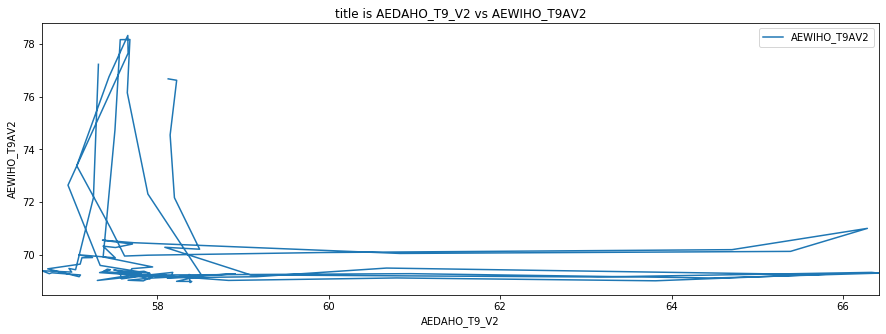

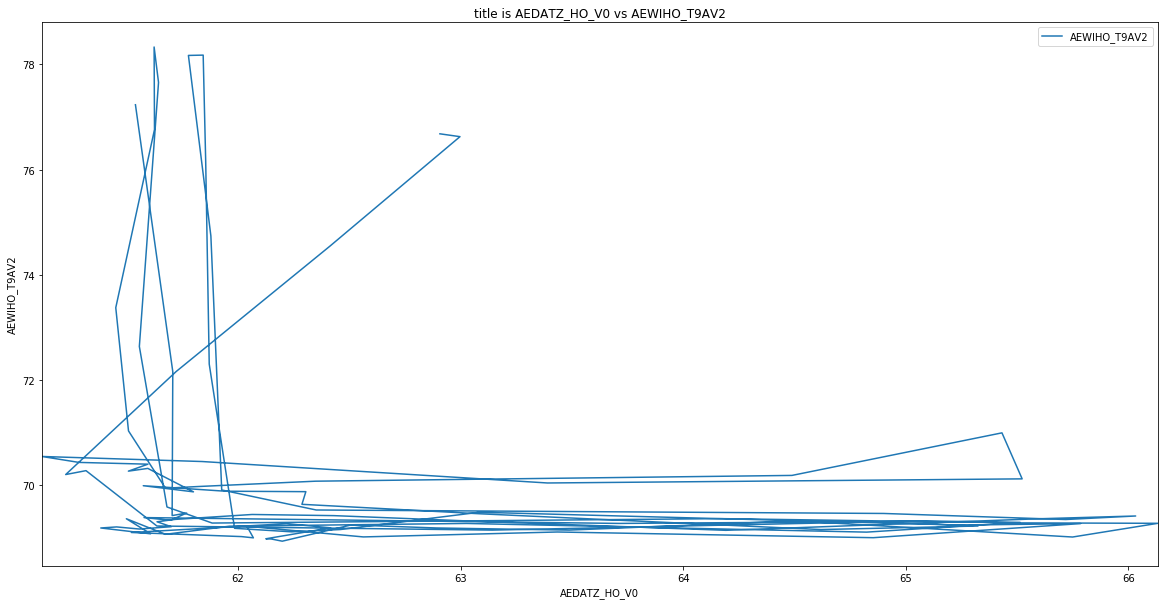

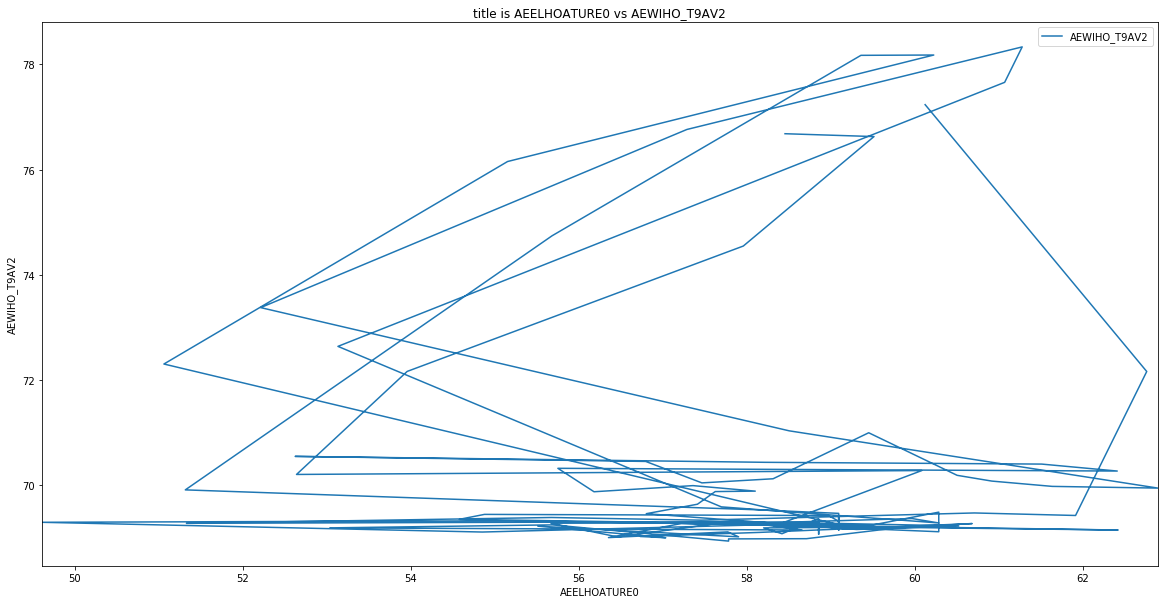

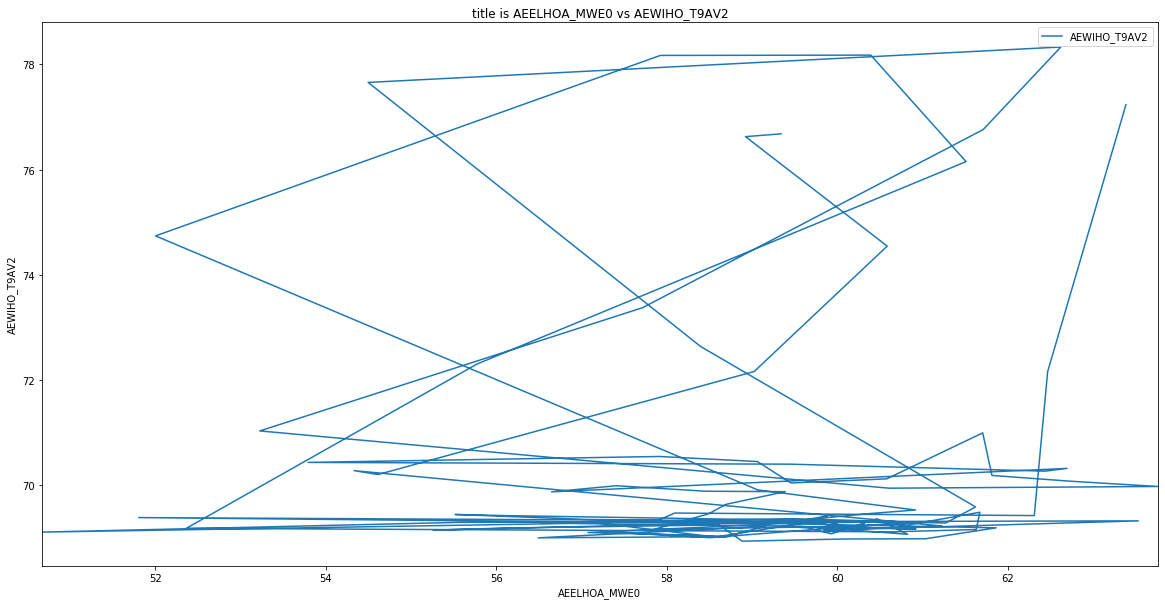

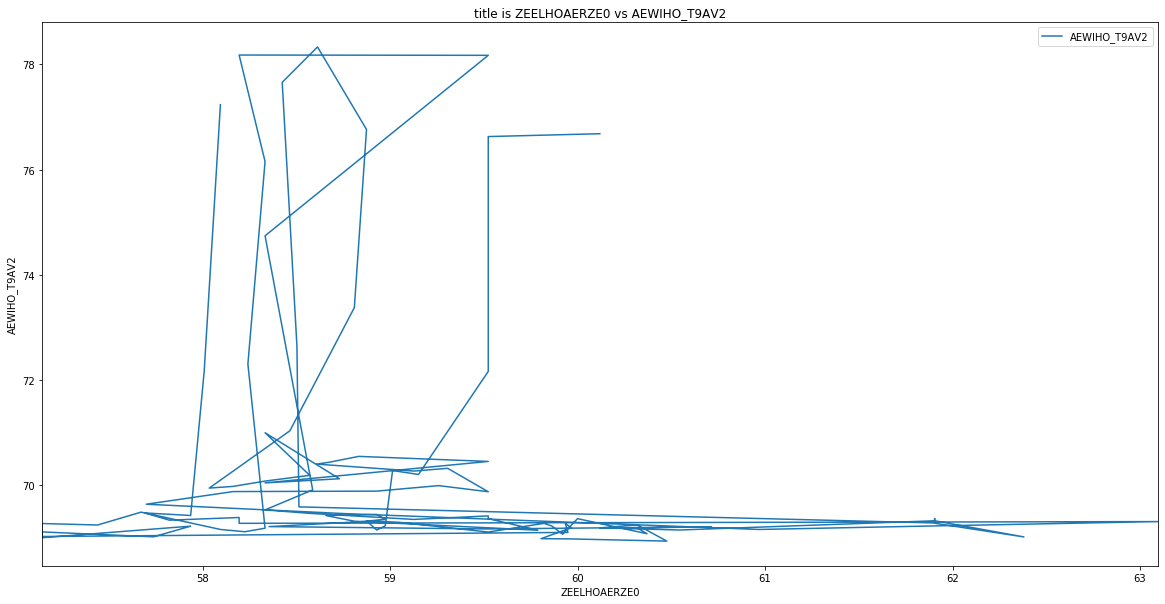

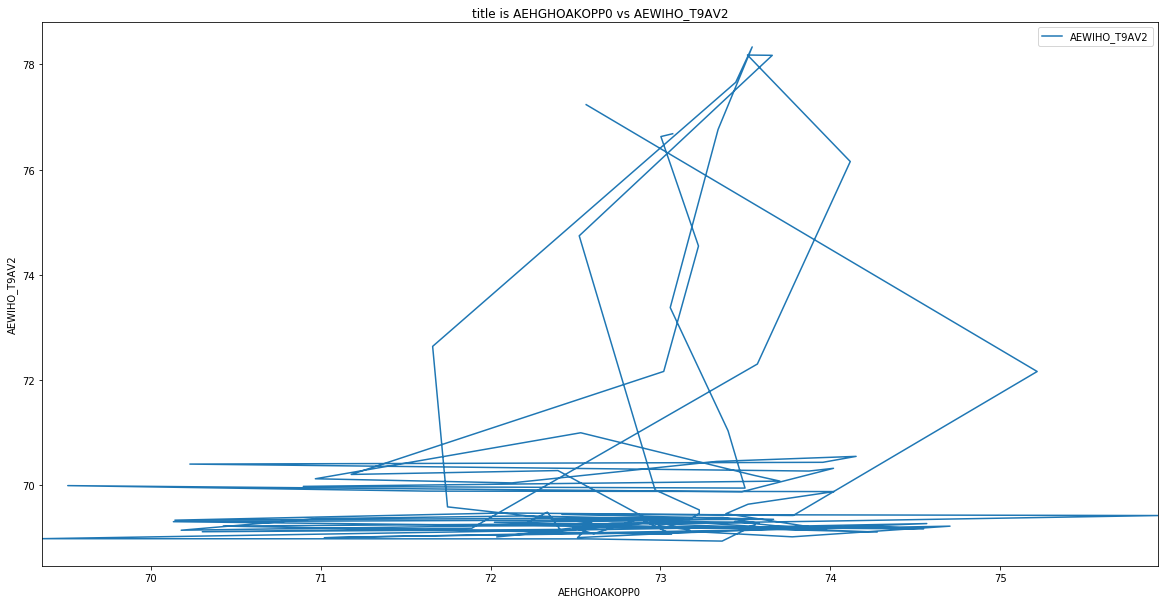

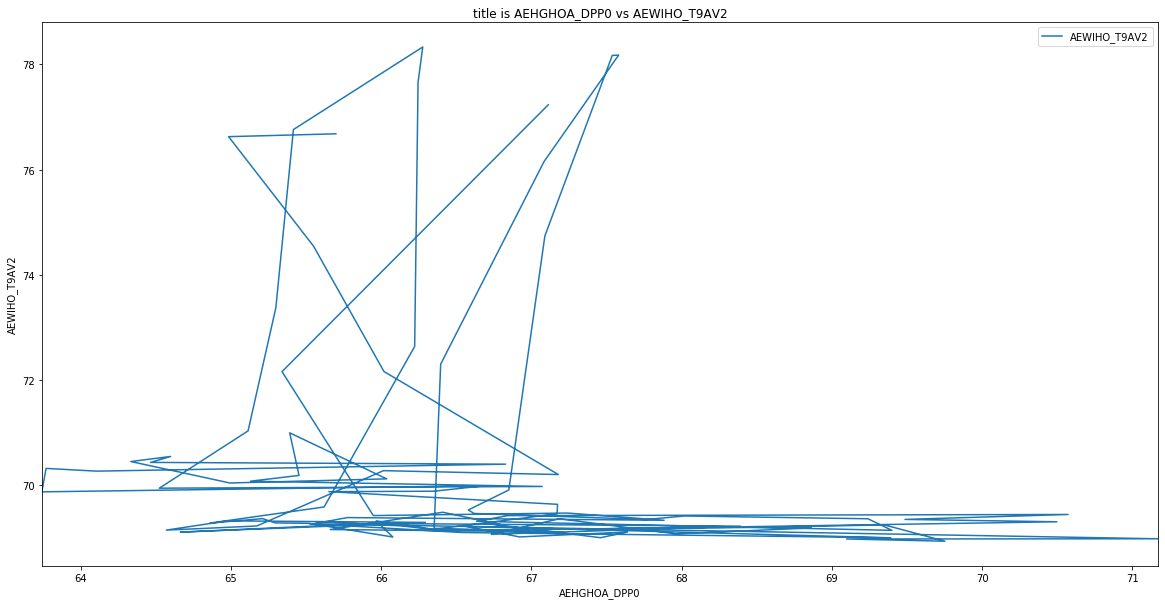

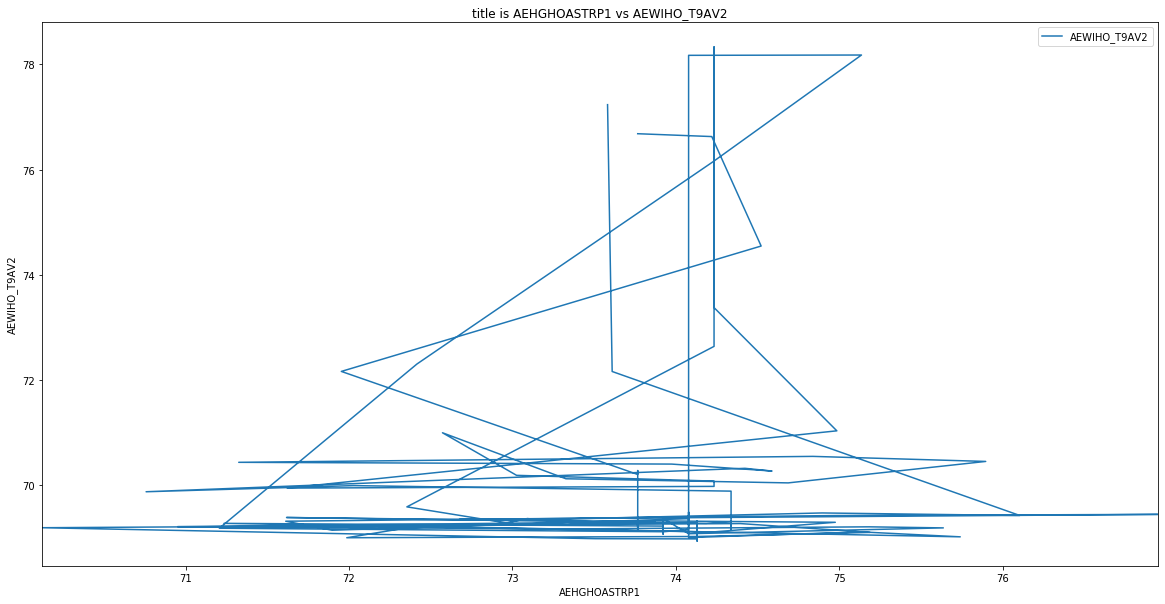

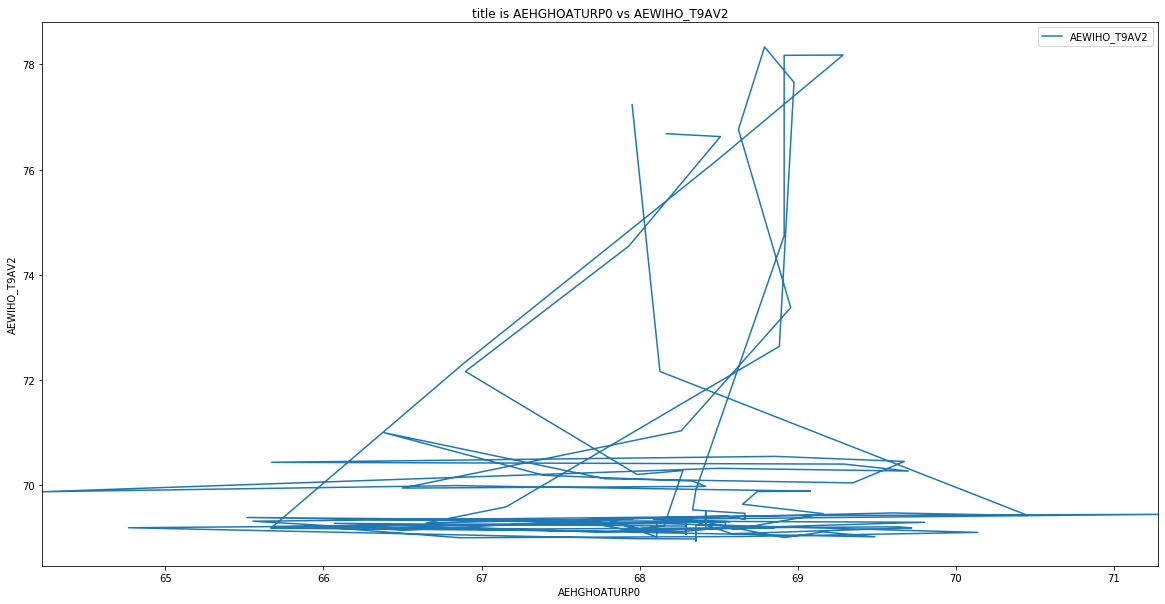

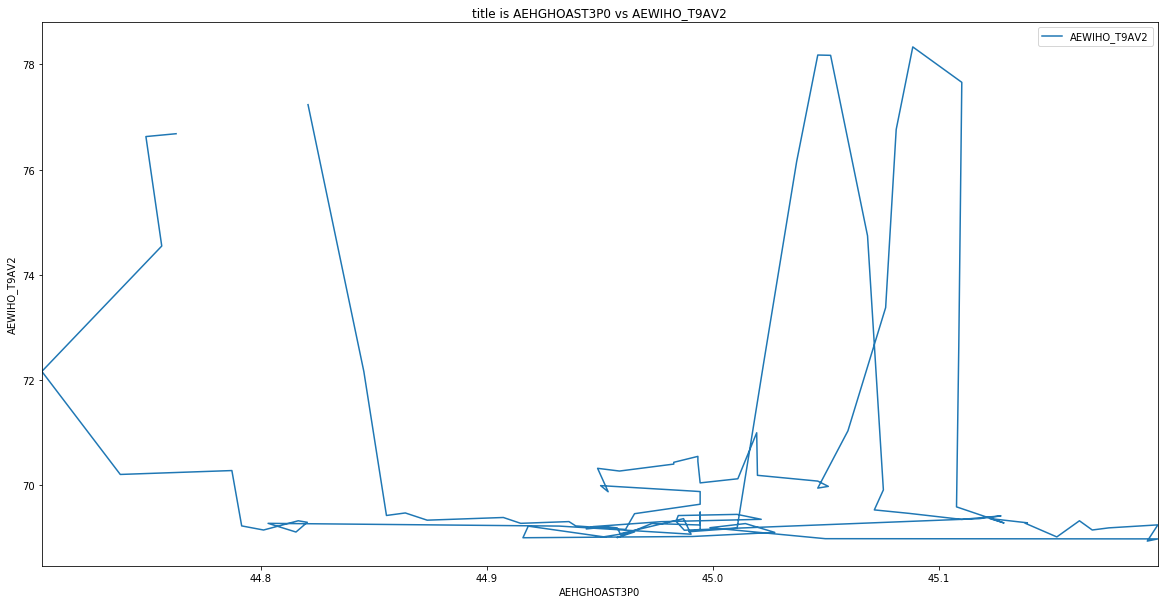

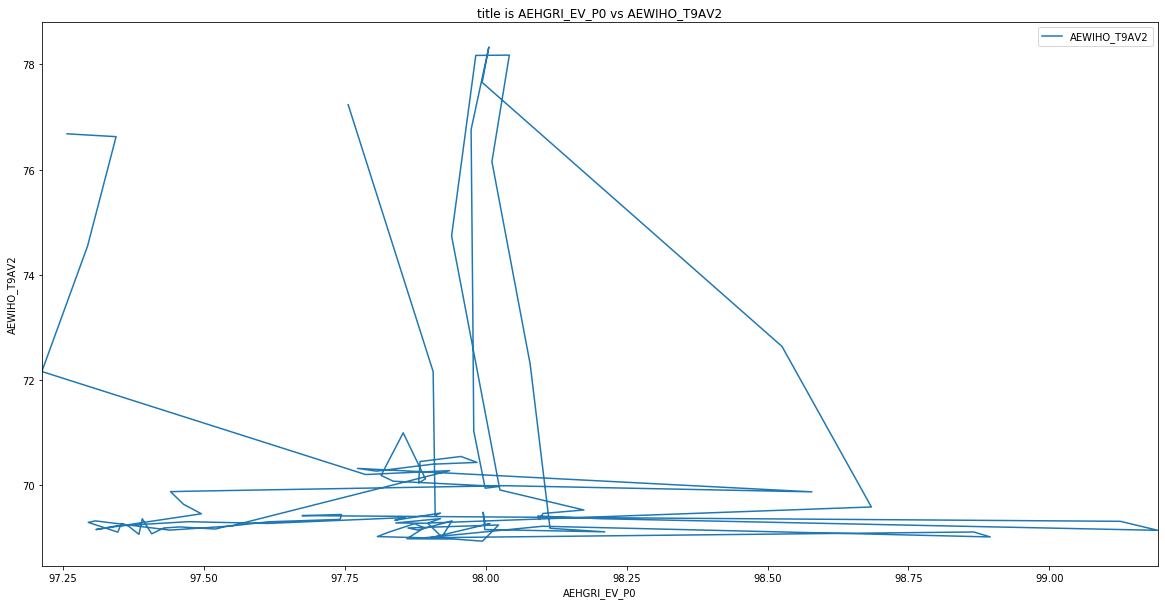

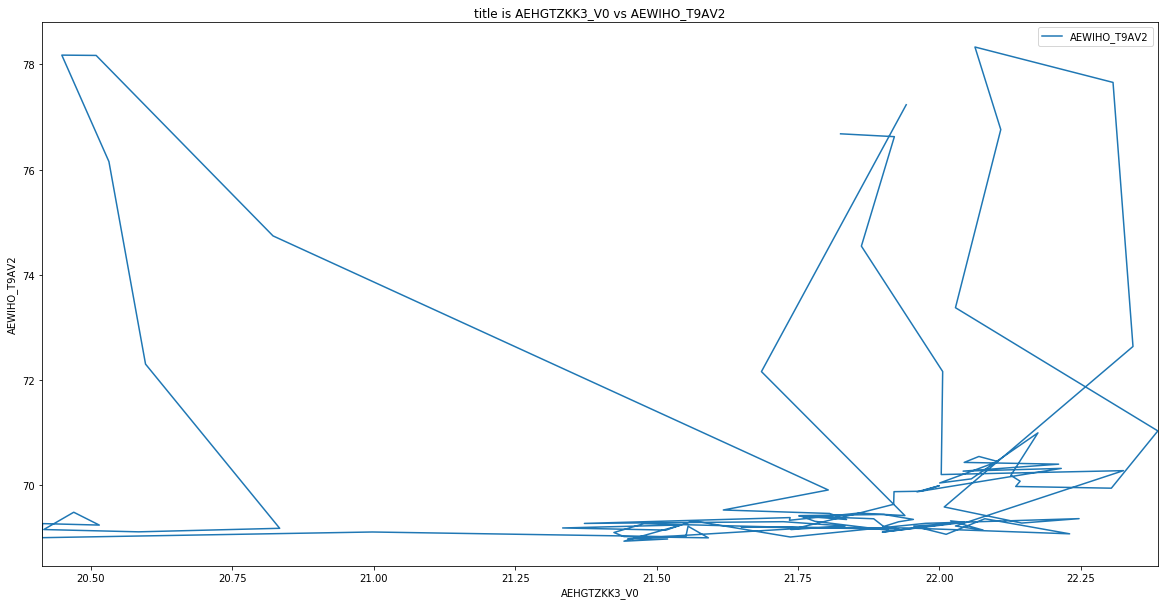

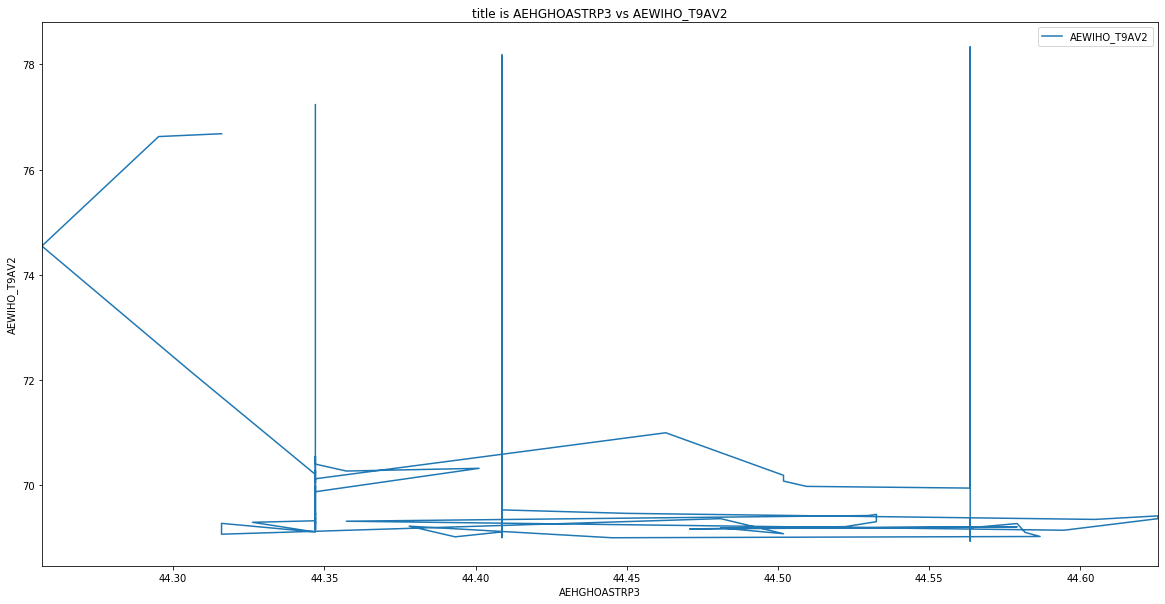

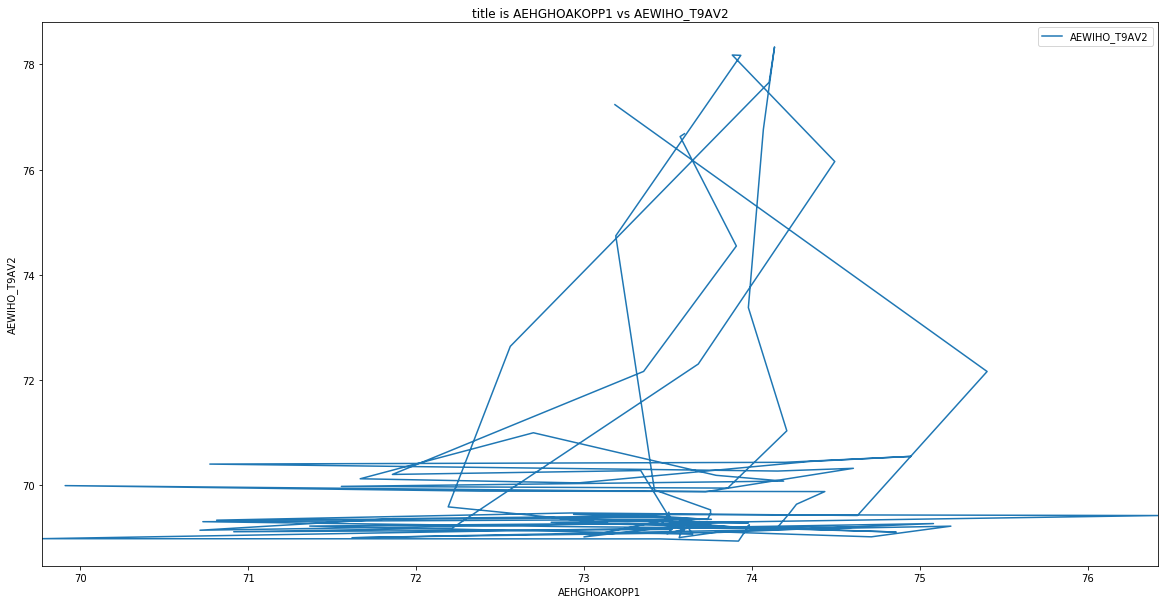

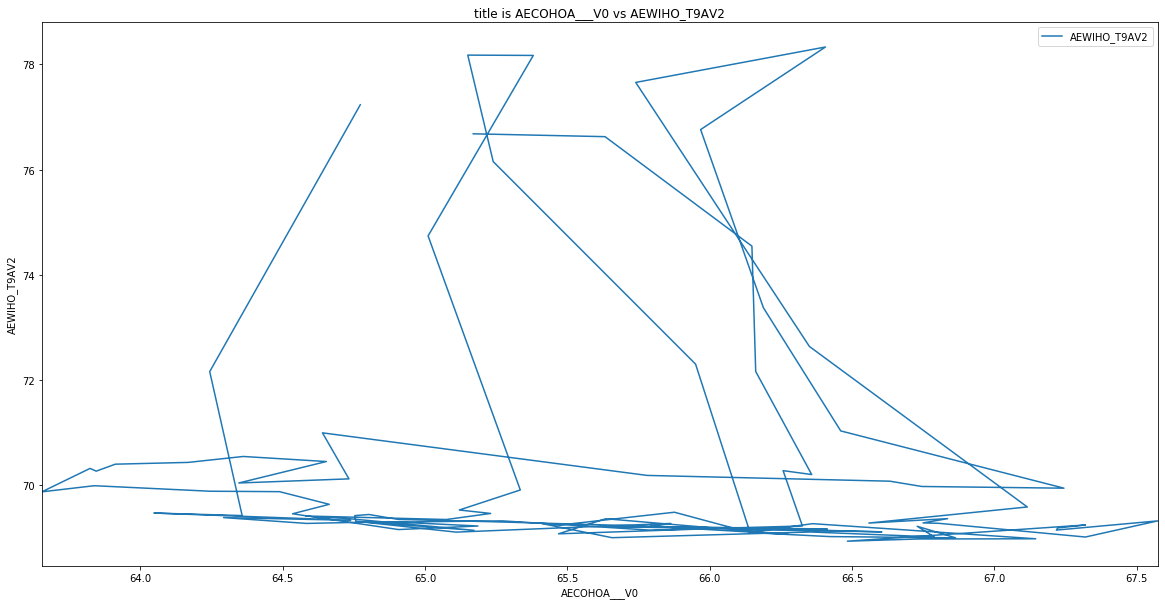

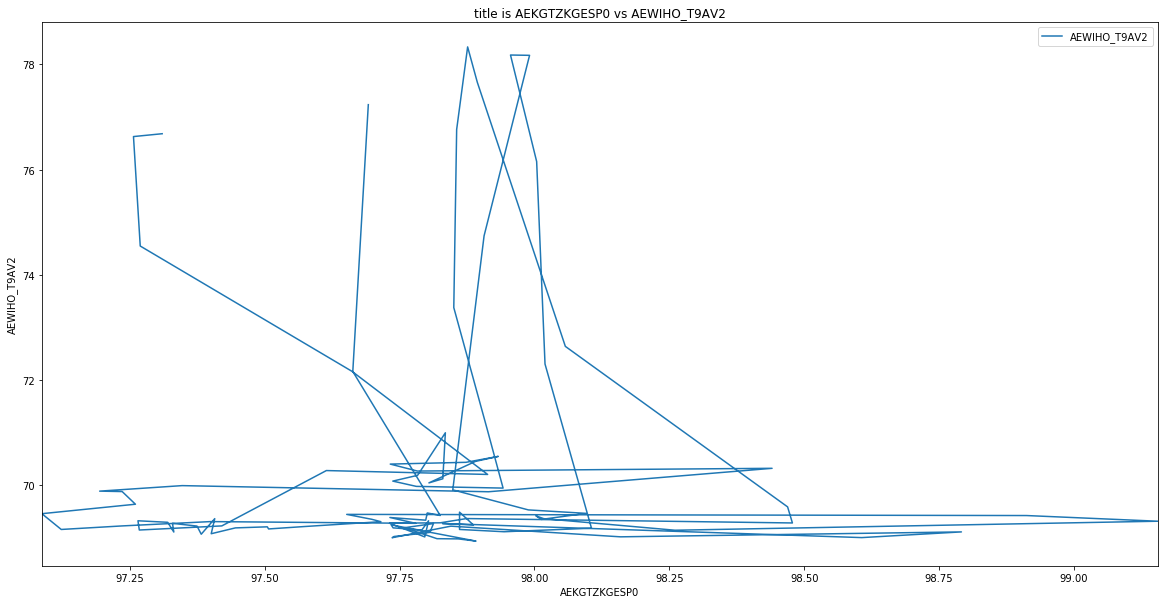

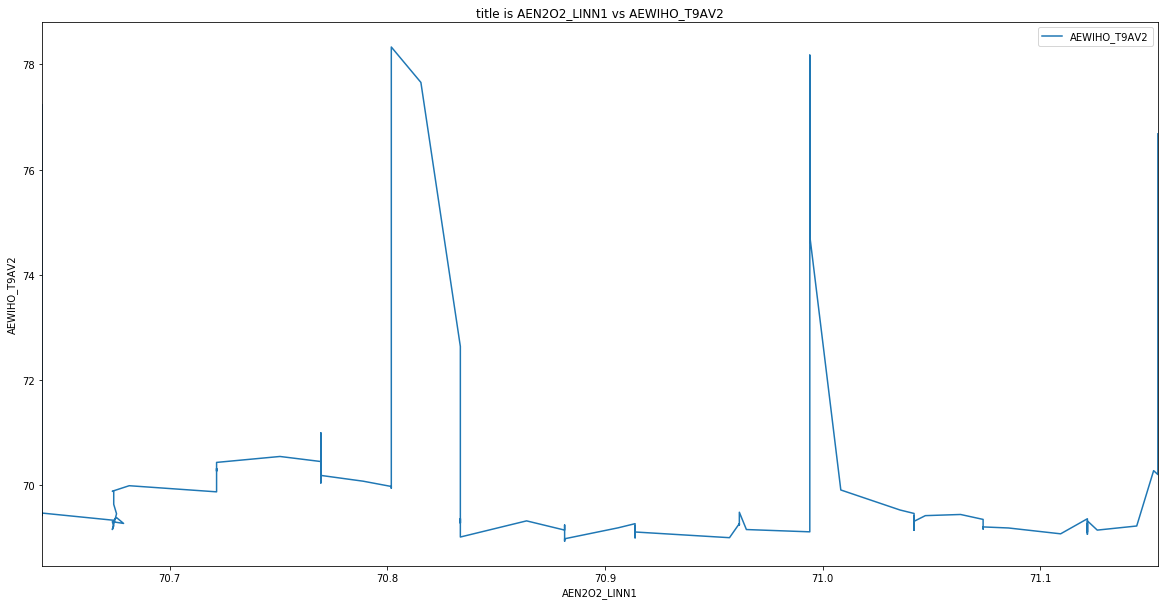

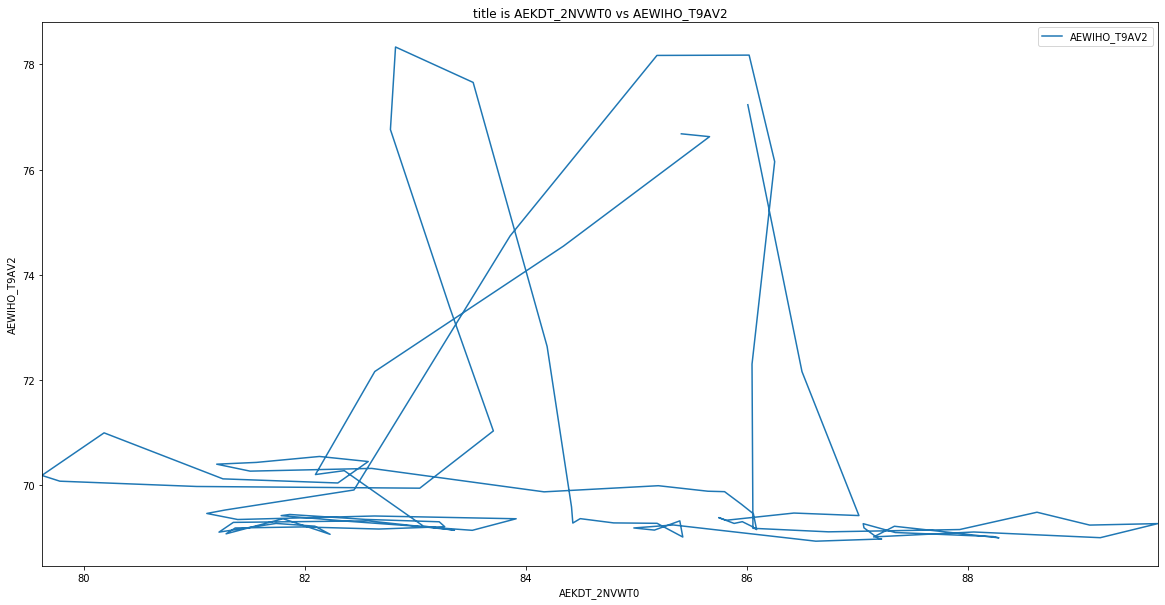

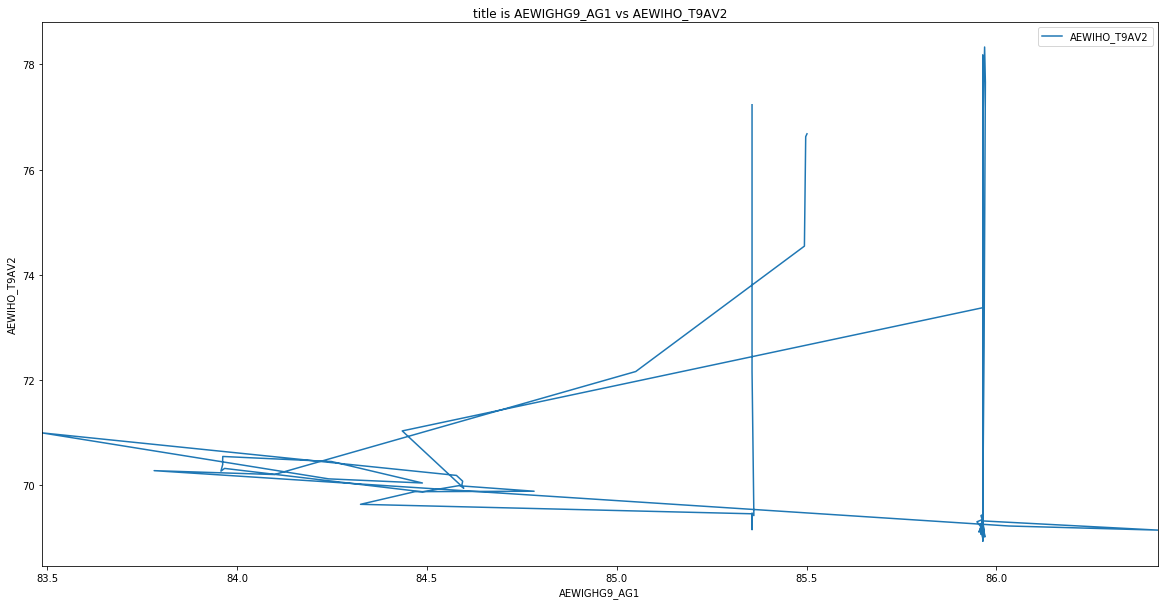

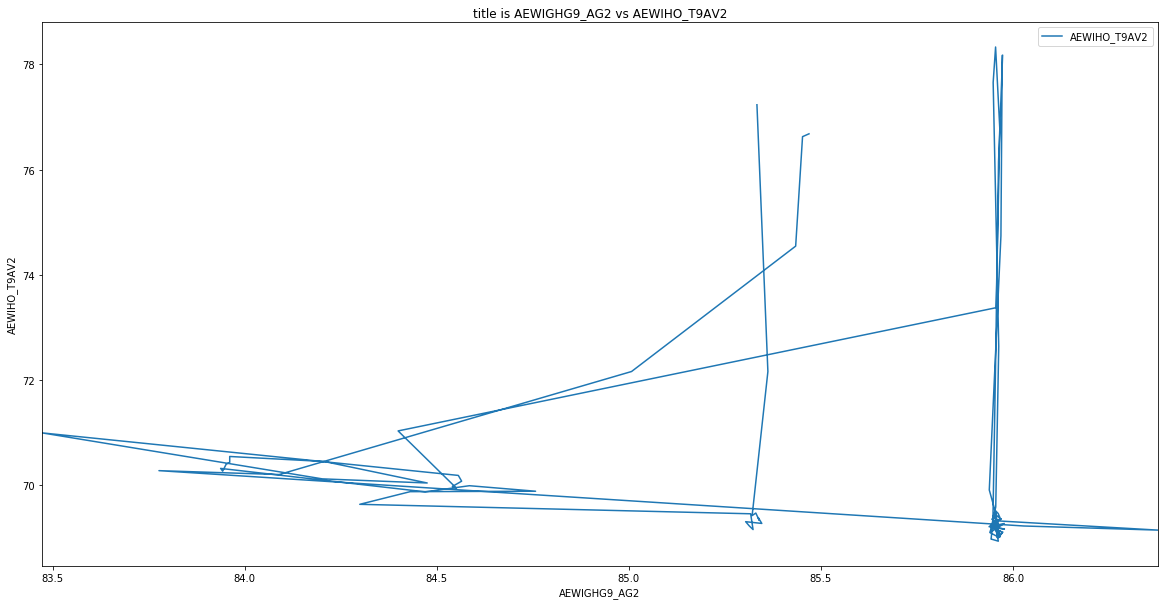

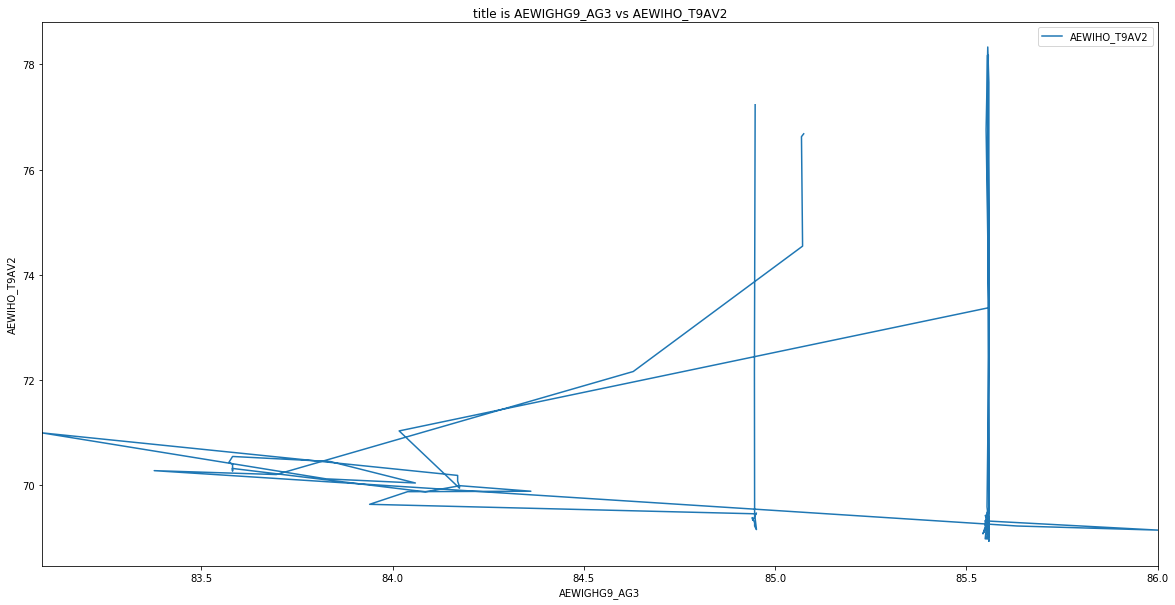

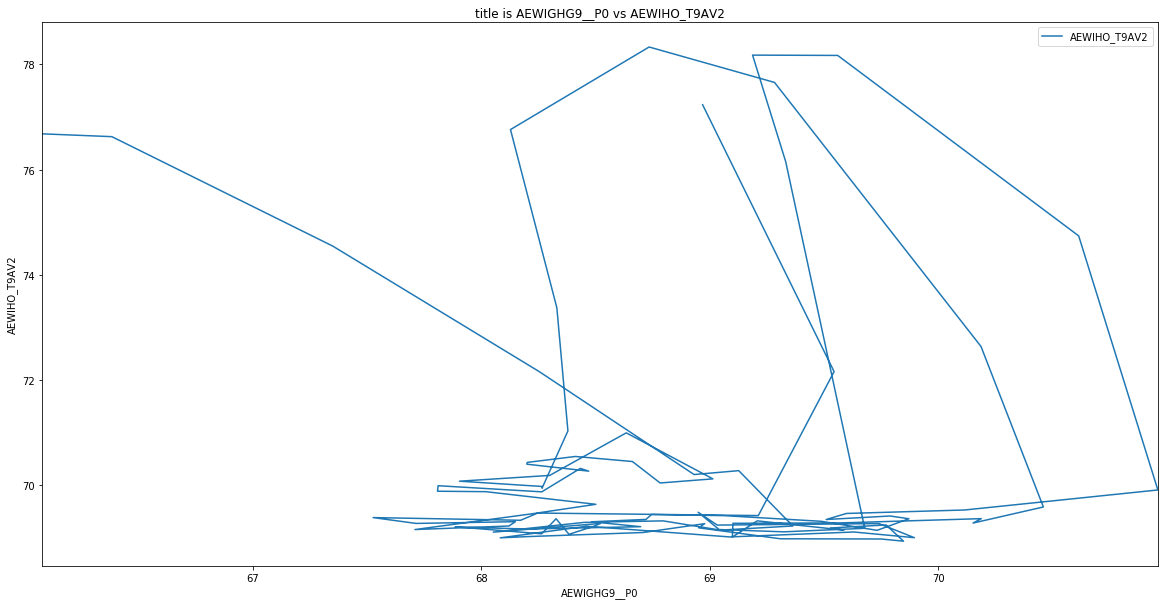

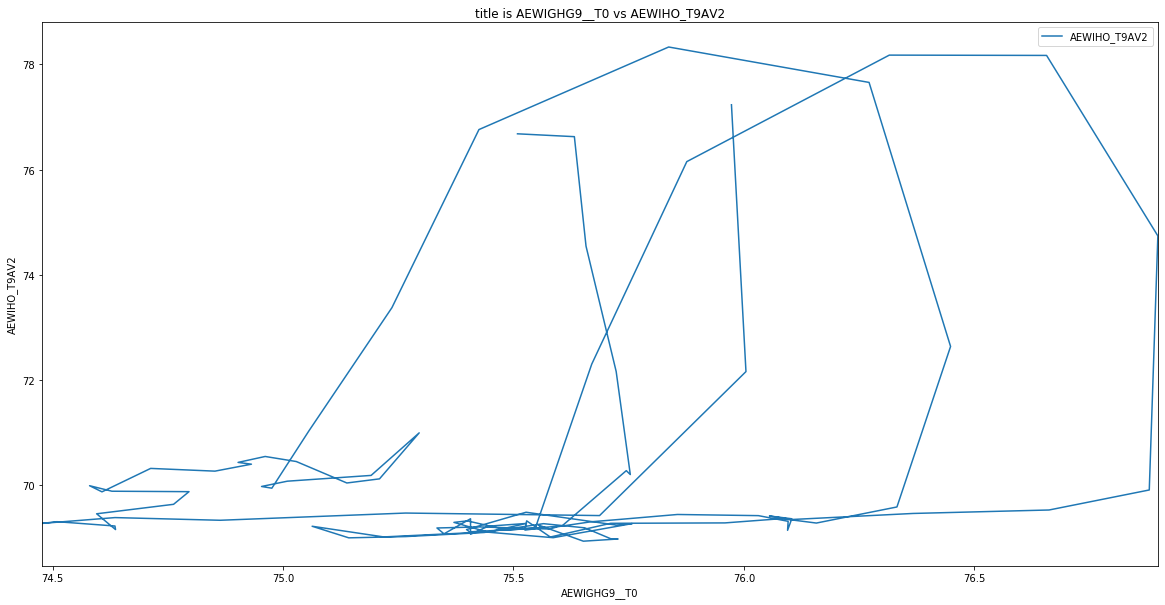

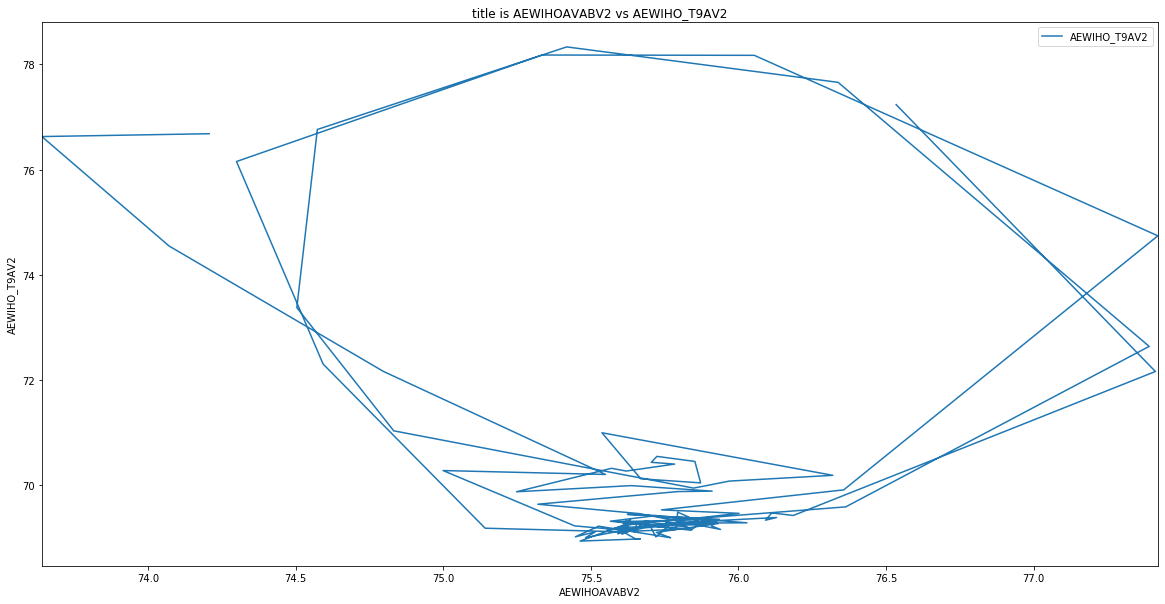

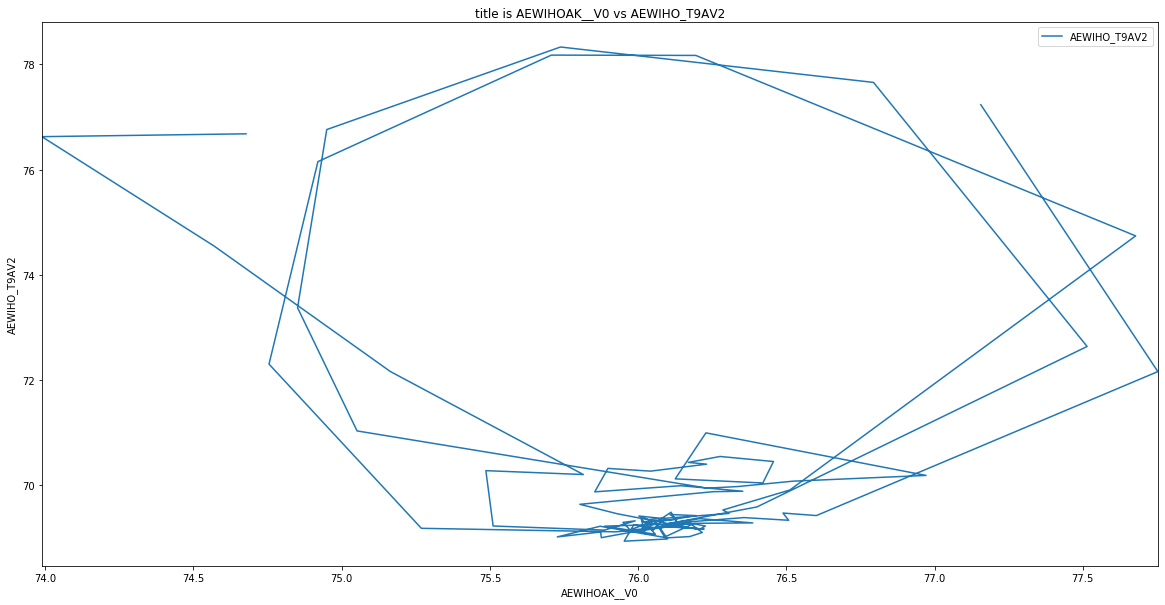

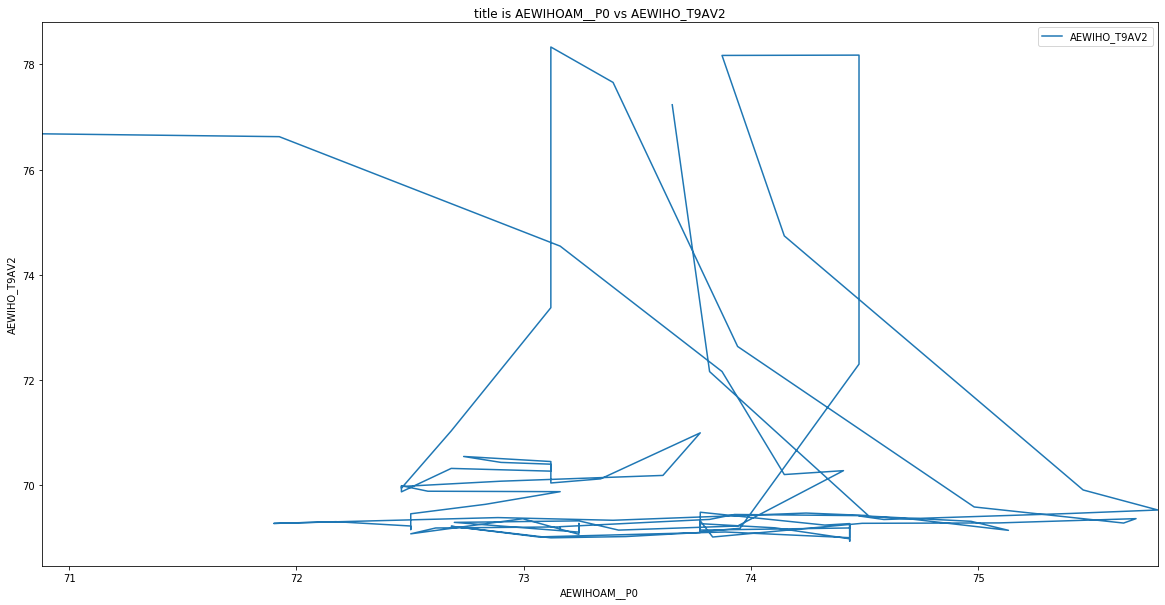

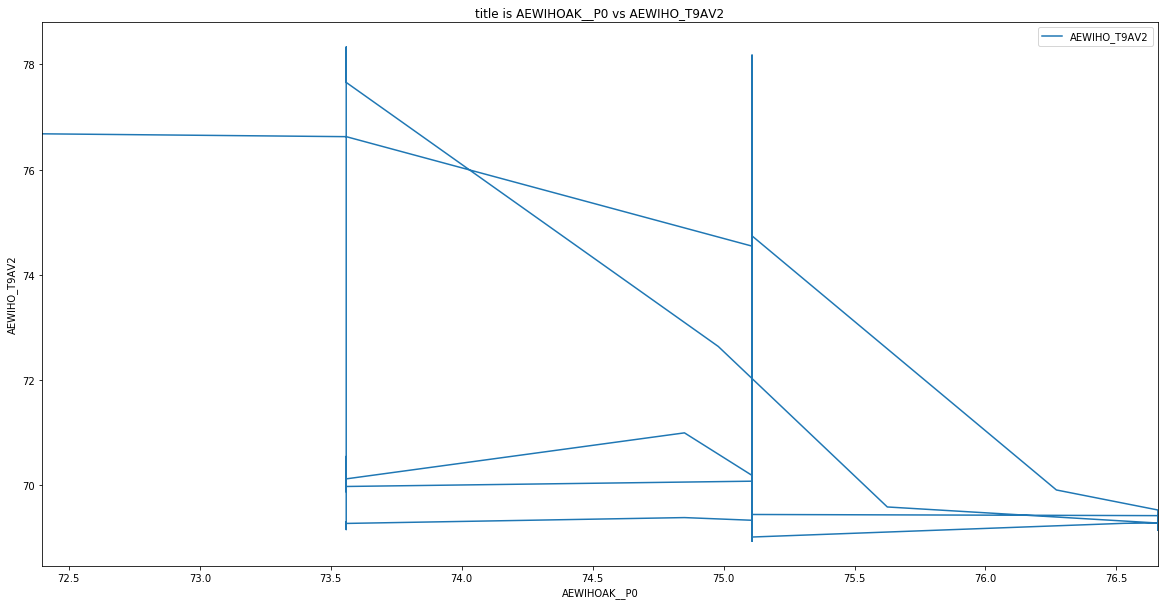

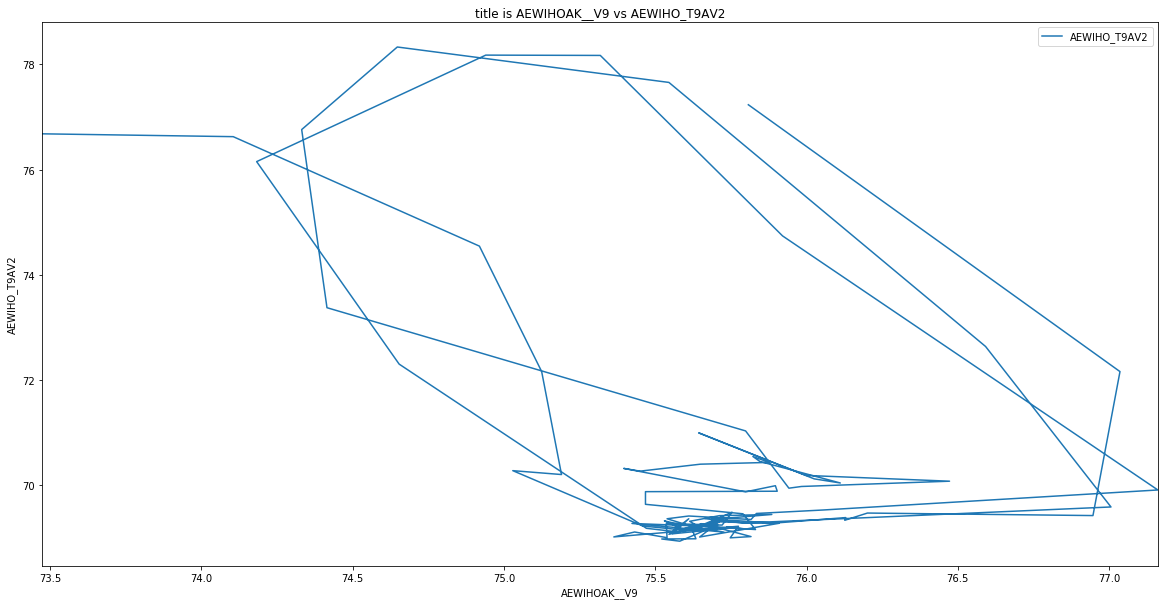

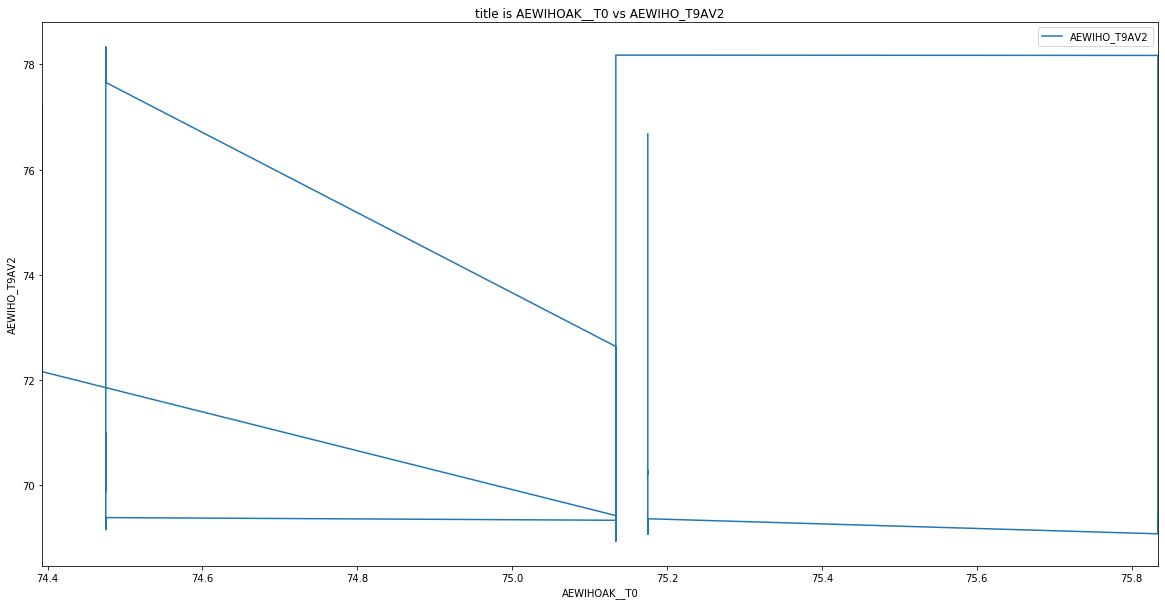

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 98.67692445436742 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


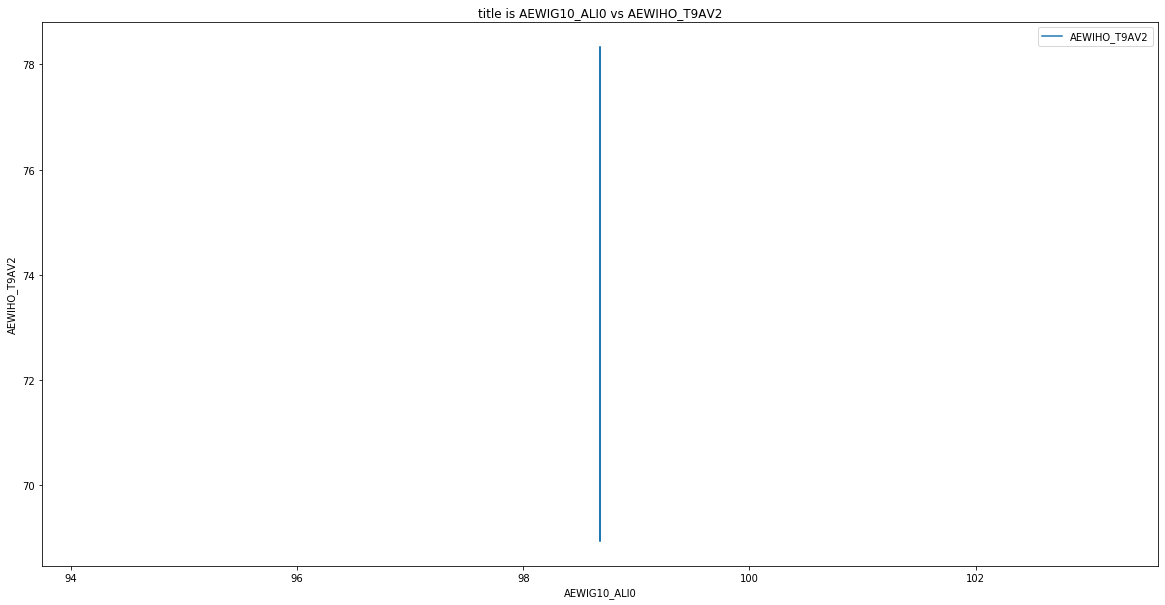

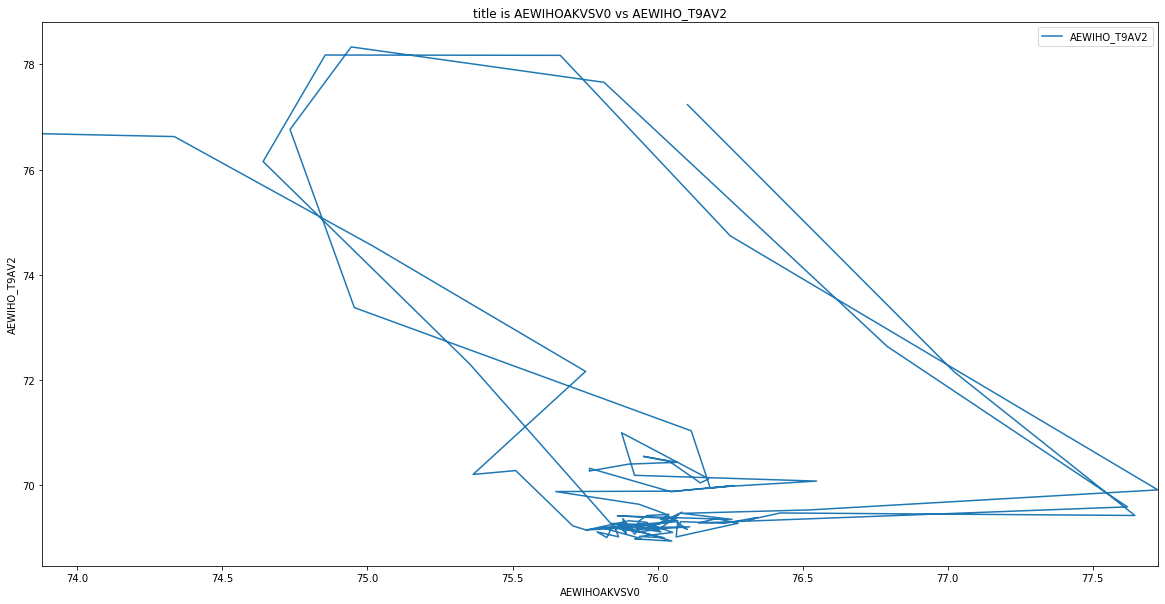

In [46]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [52]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

Number of Elements for training:  10693
dataset length:  10912
train_input shape:  (10693, 31)
train_output shape:  (10693,)
test_input shape:  (219, 31)
test_output shape:  (219,)


In [54]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file now created


------- LinearRegression


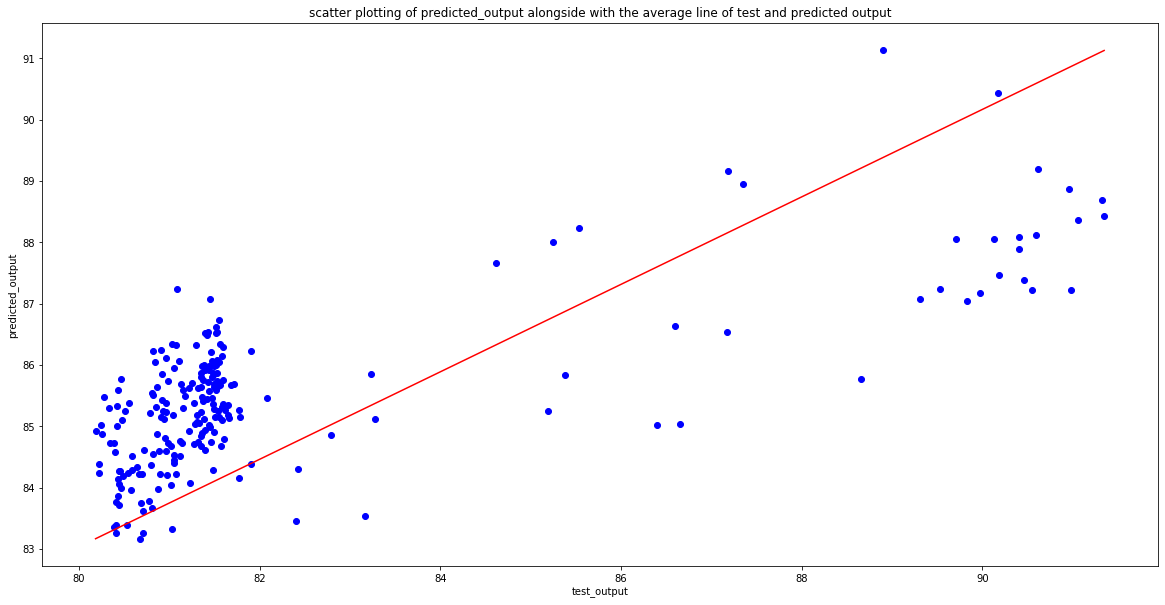

<class 'numpy.ndarray'>


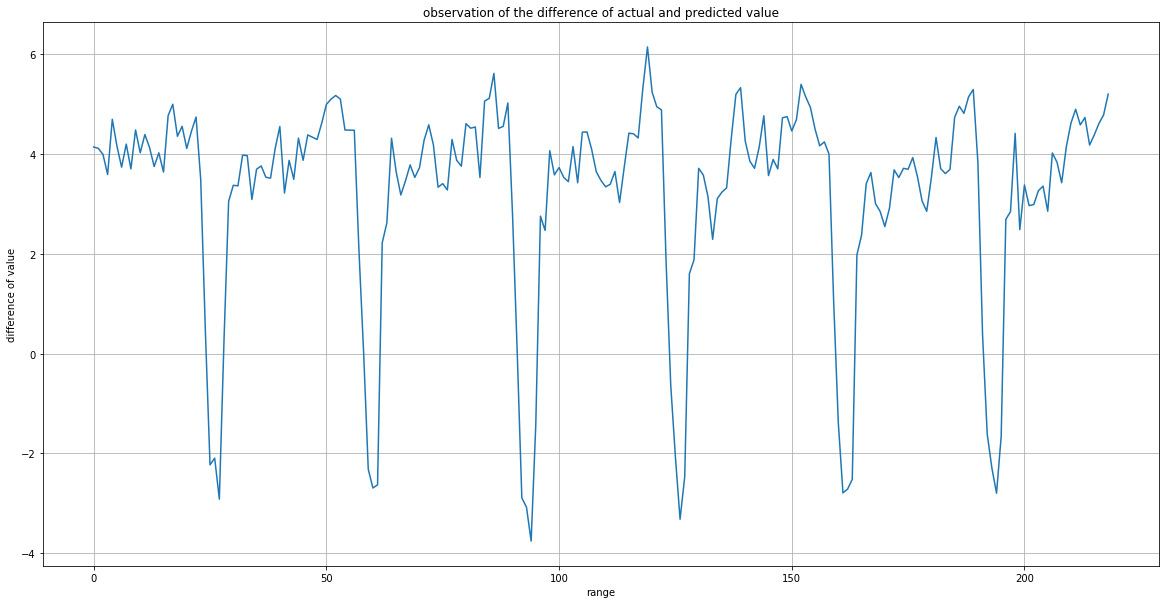

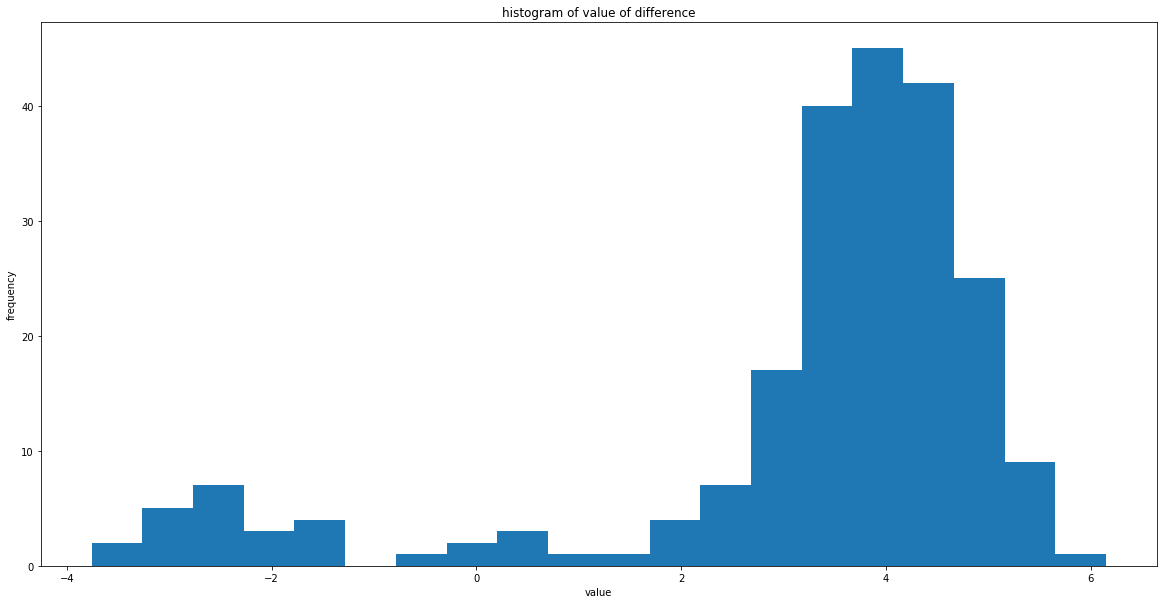

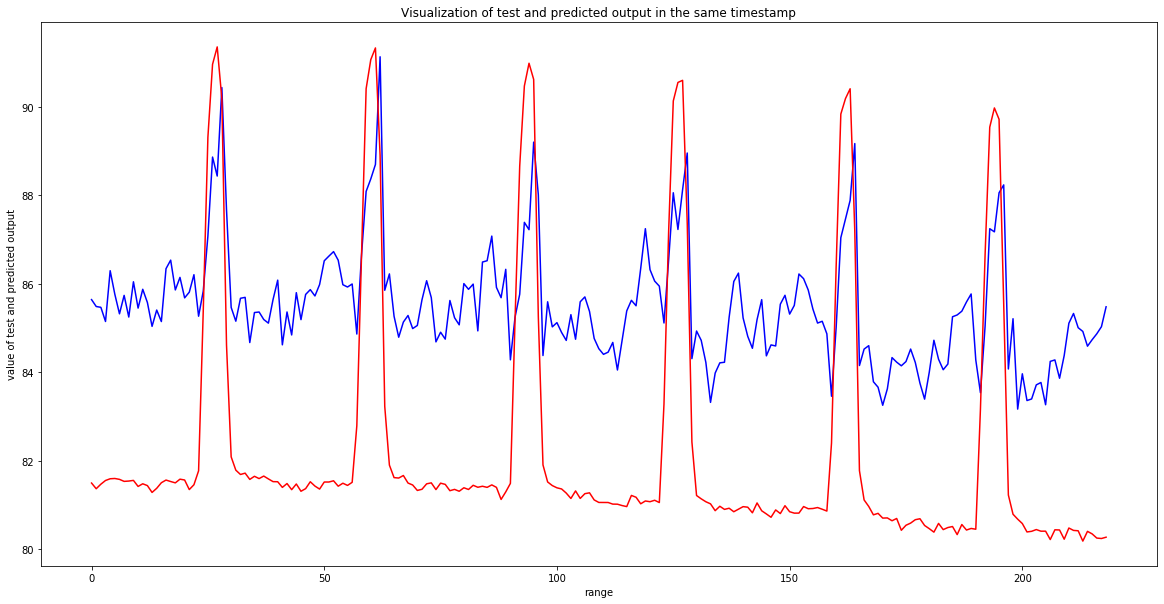

r_2 statistic: -0.79
Mean_absolute_error: 3.69
Mean squared error: 14.74
RMSE:  3.8392157248985477
!!!!---------------!!!!----------------!!!!
------- Lasso


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364.2775133135583, tolerance: 77.4963834589902
  positive)


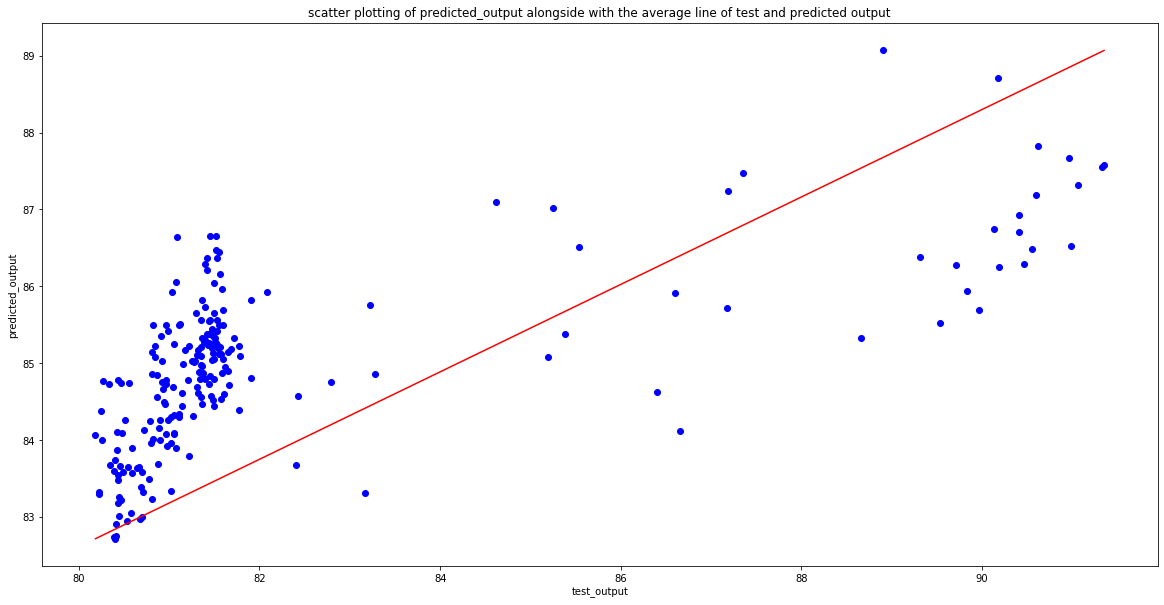

<class 'numpy.ndarray'>


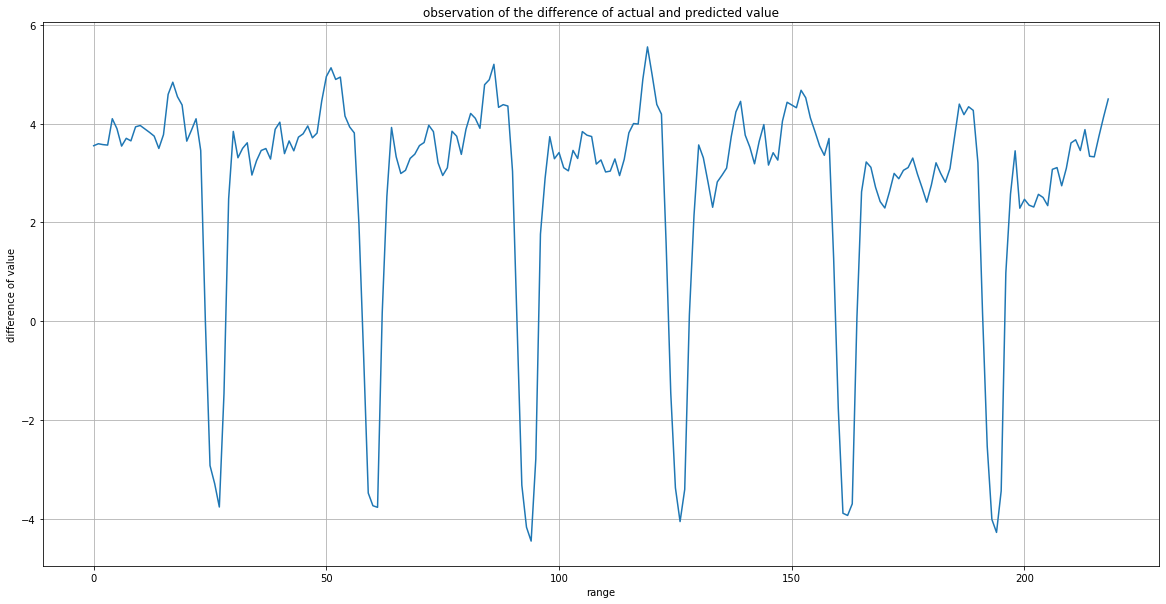

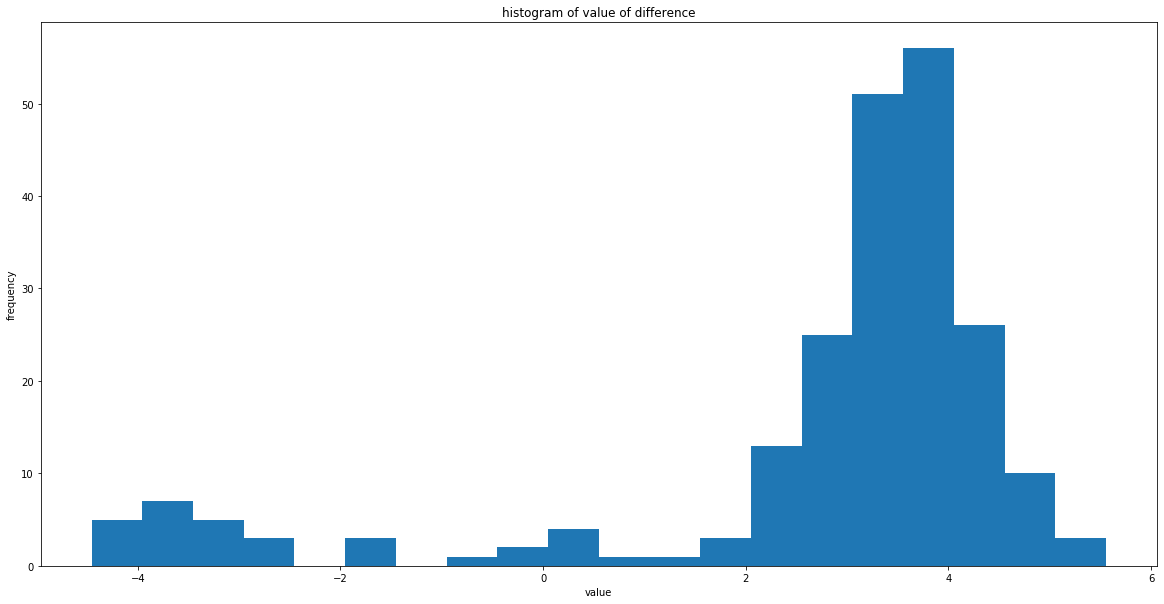

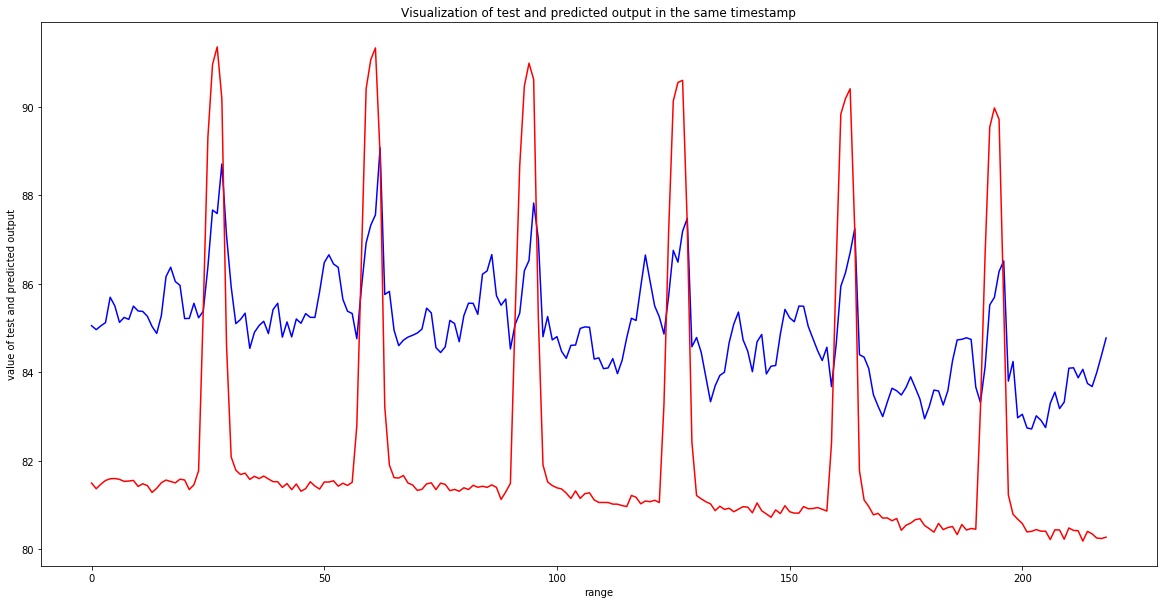

r_2 statistic: -0.52
Mean_absolute_error: 3.40
Mean squared error: 12.45
RMSE:  3.5288491687944474
!!!!---------------!!!!----------------!!!!
------- Ridge


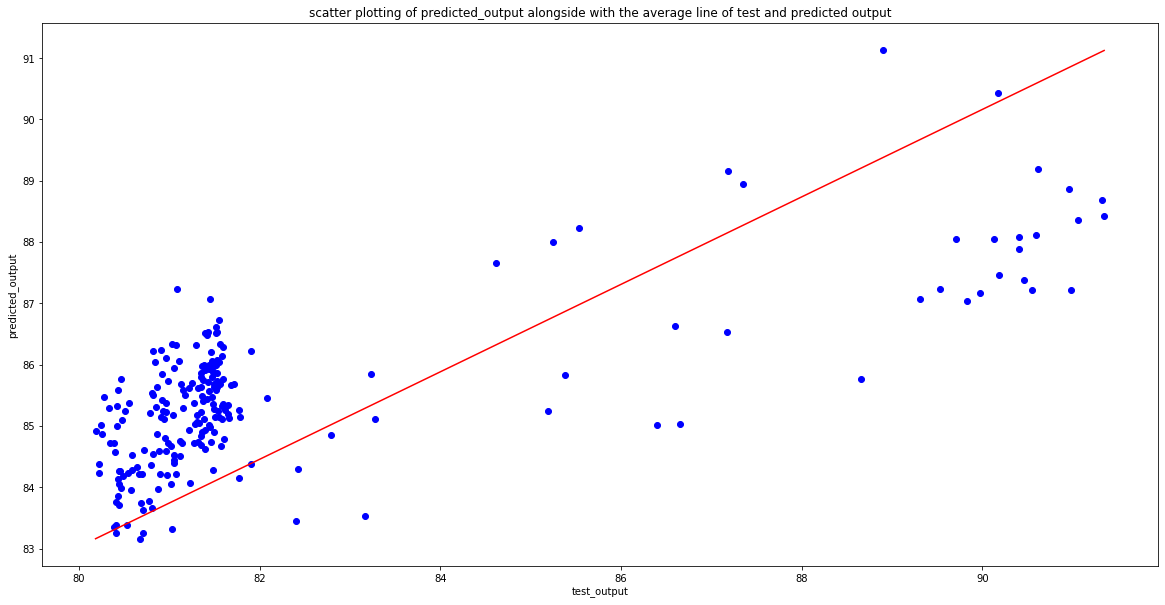

<class 'numpy.ndarray'>


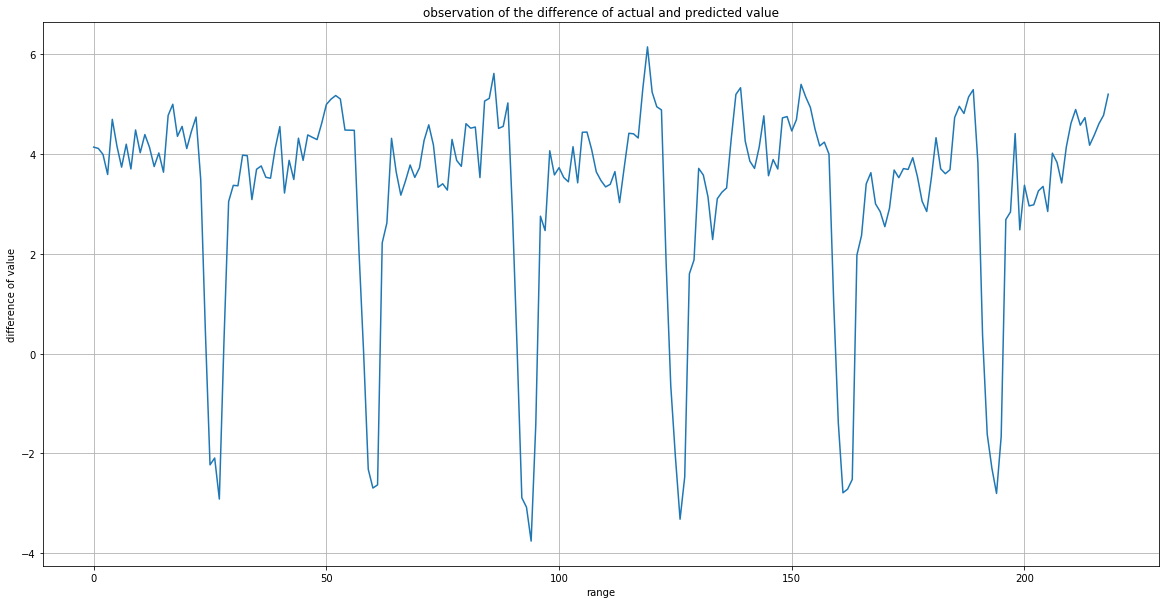

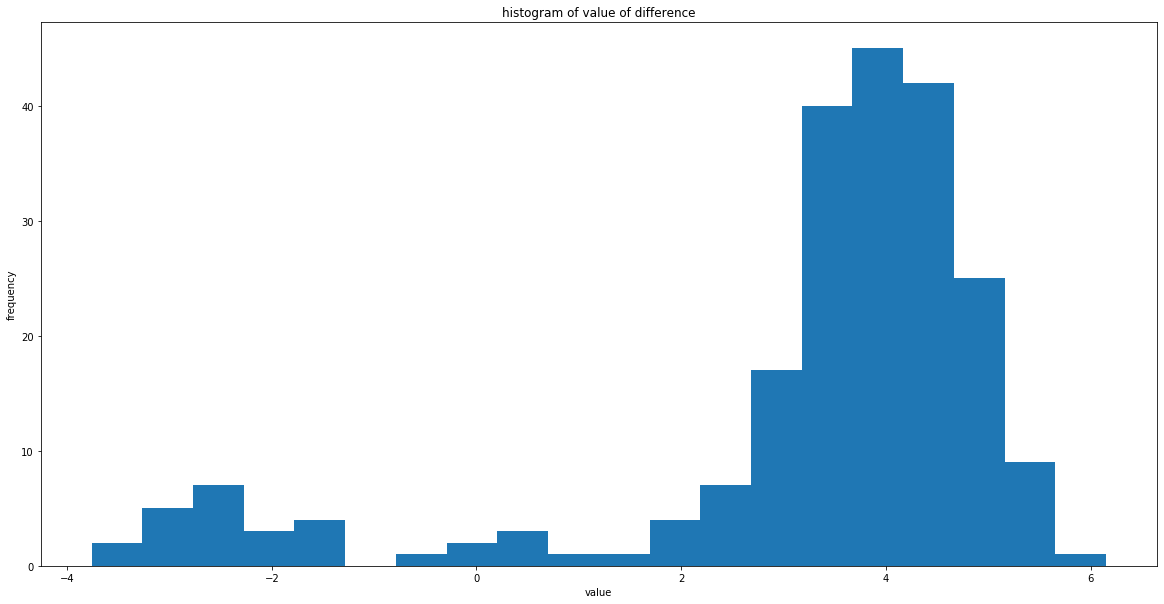

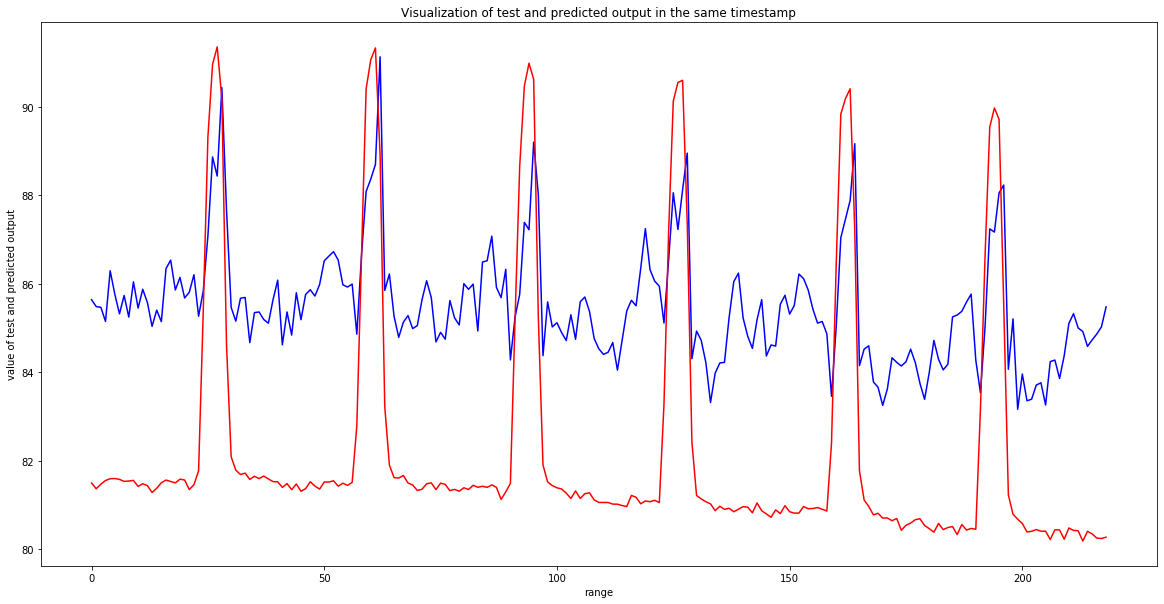

r_2 statistic: -0.79
Mean_absolute_error: 3.69
Mean squared error: 14.73
RMSE:  3.837673317063165
!!!!---------------!!!!----------------!!!!
------- BayesianRidge


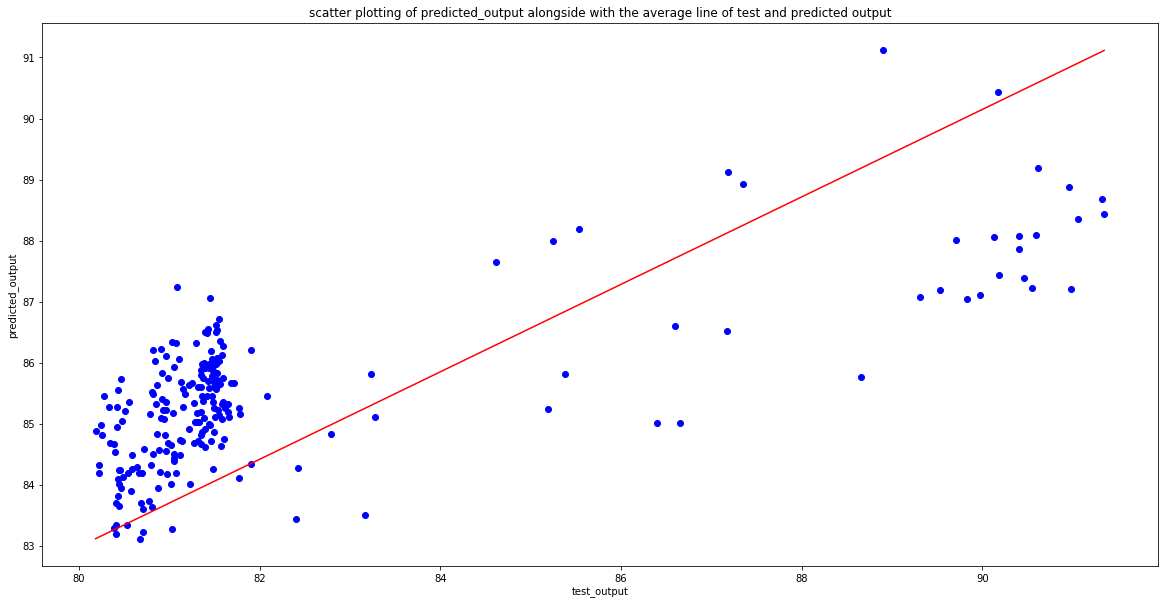

<class 'numpy.ndarray'>


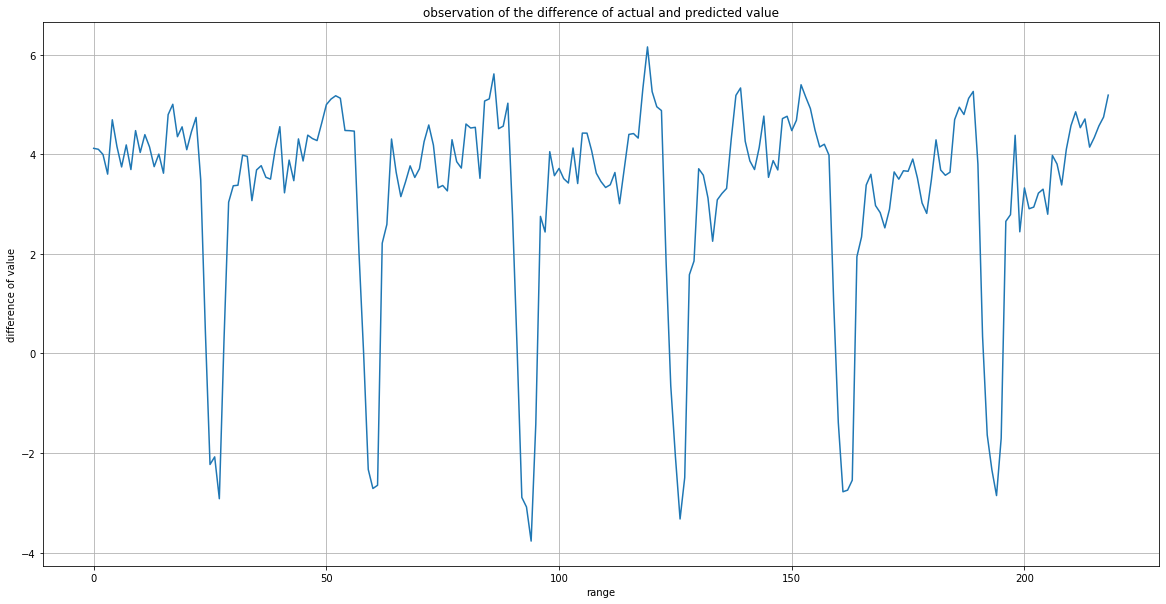

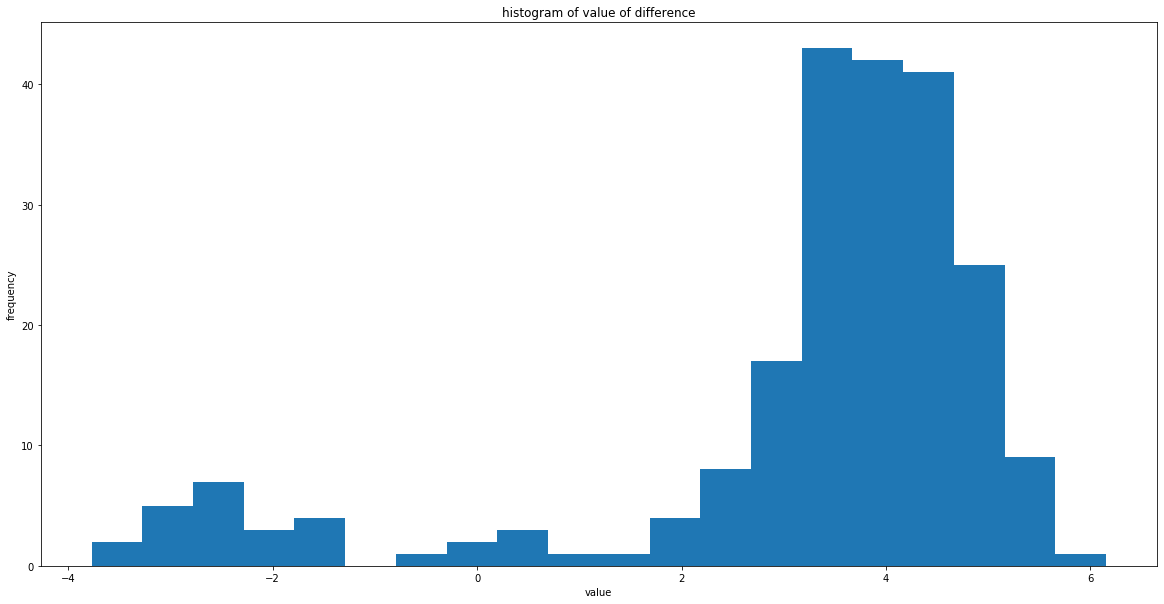

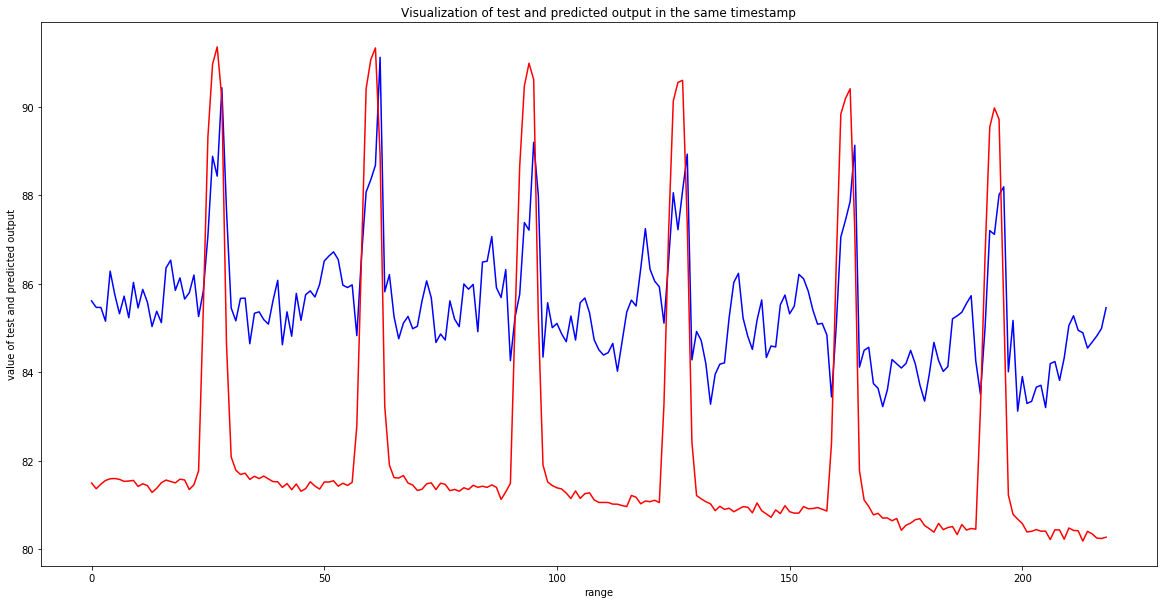

r_2 statistic: -0.78
Mean_absolute_error: 3.67
Mean squared error: 14.61
RMSE:  3.8217270315154193
!!!!---------------!!!!----------------!!!!
------- tree


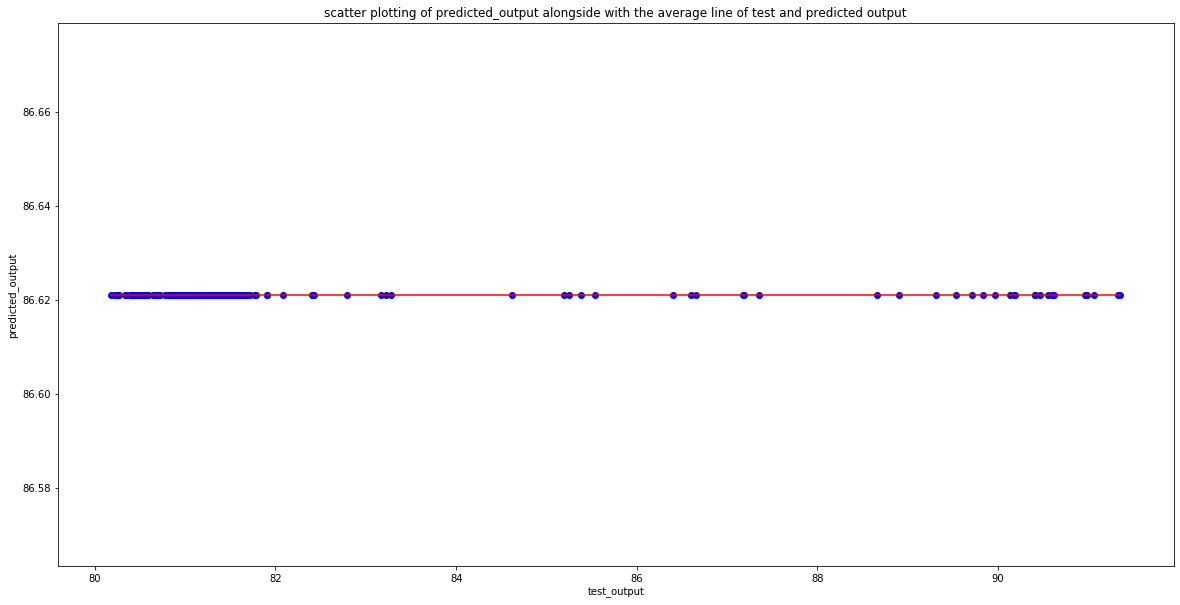

<class 'numpy.ndarray'>


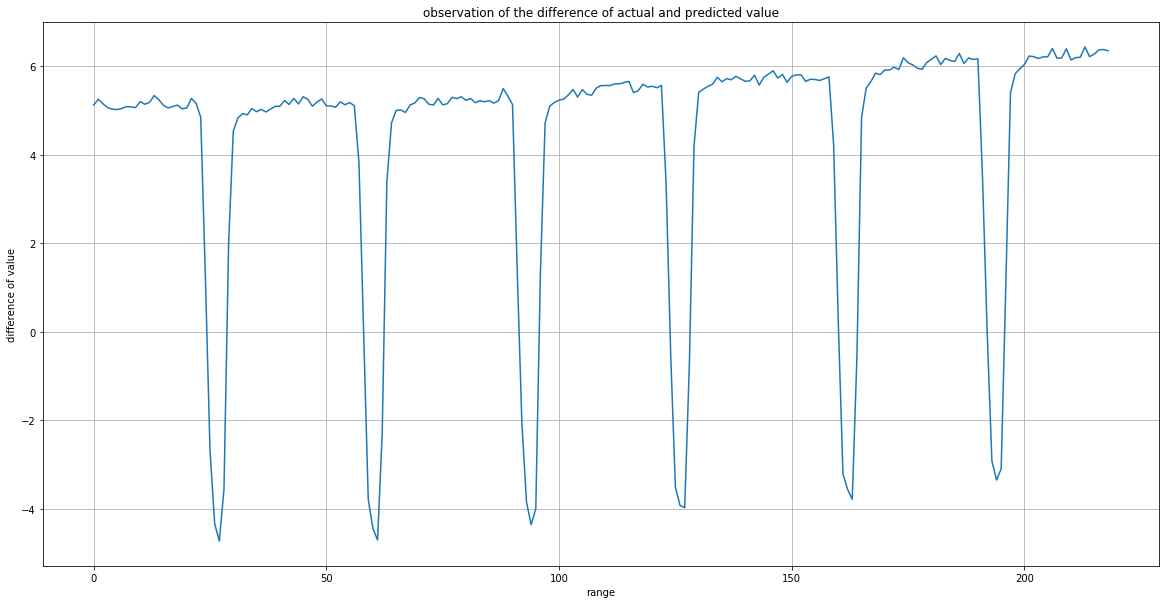

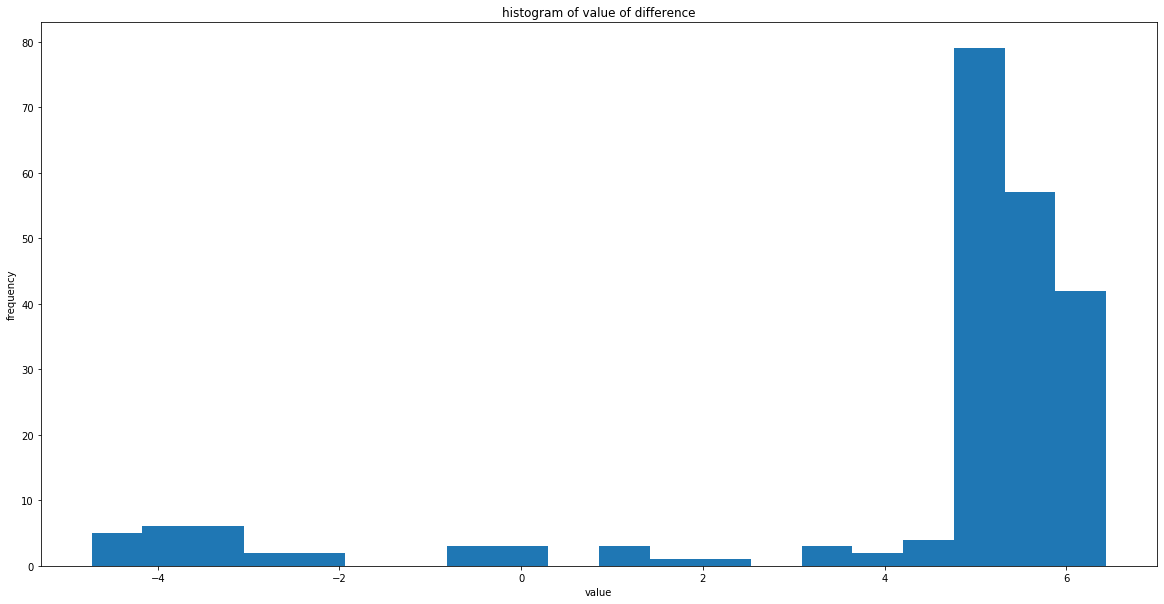

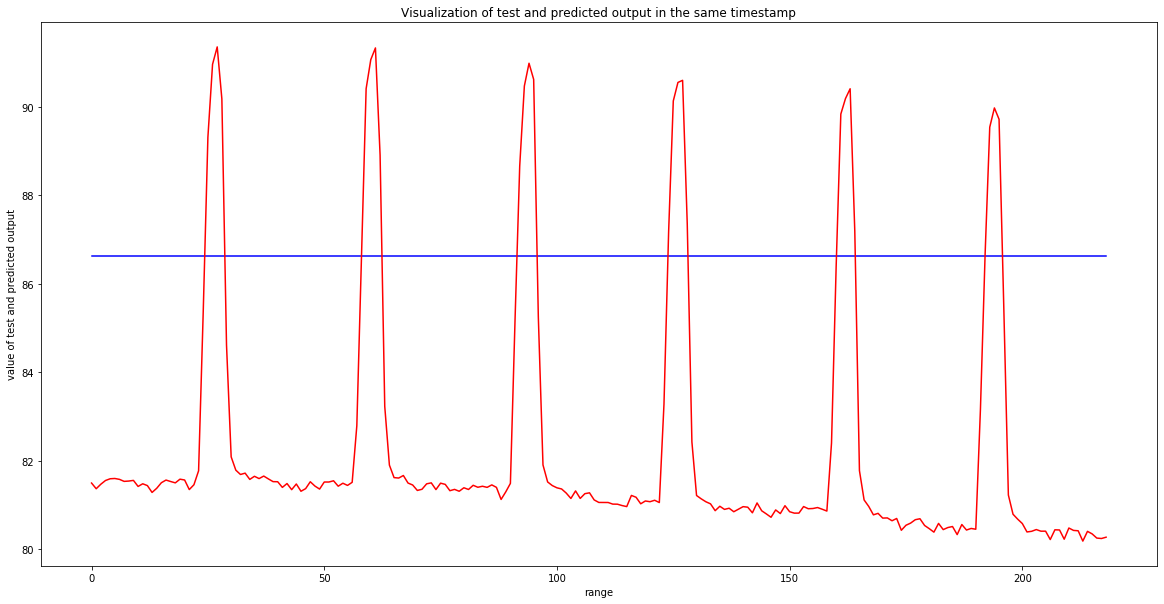

r_2 statistic: -2.29
Mean_absolute_error: 5.05
Mean squared error: 27.02
RMSE:  5.197771916946574
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


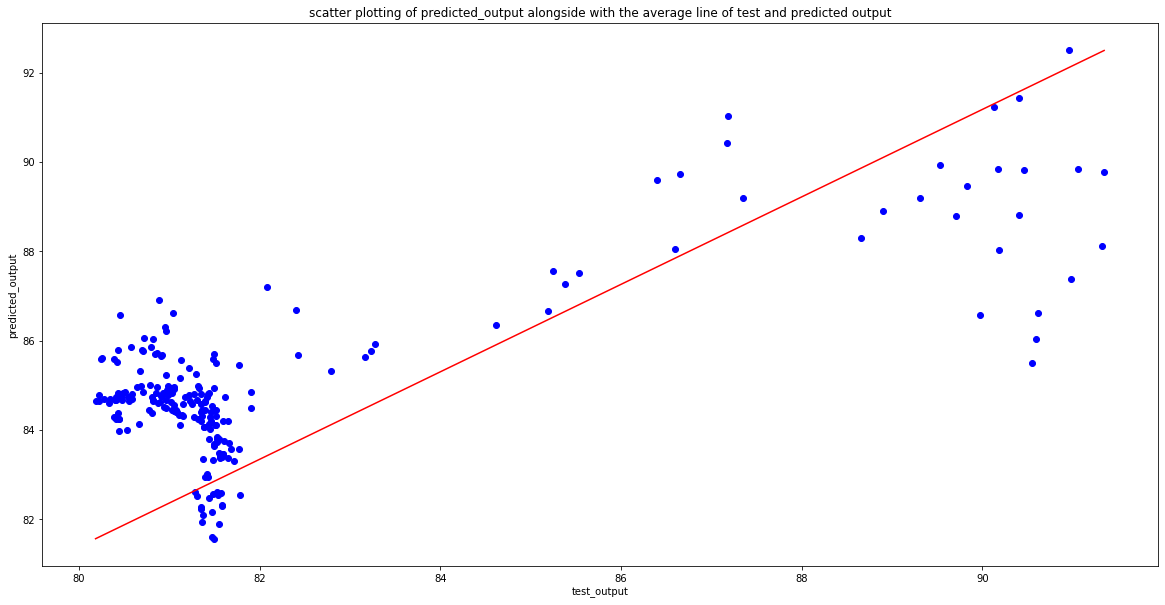

<class 'numpy.ndarray'>


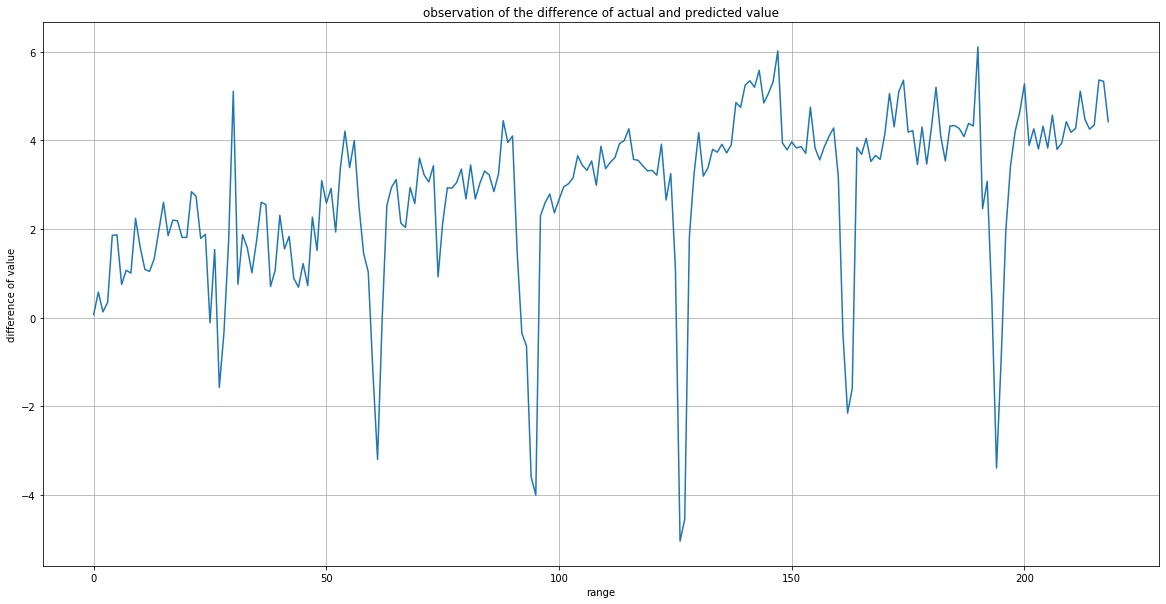

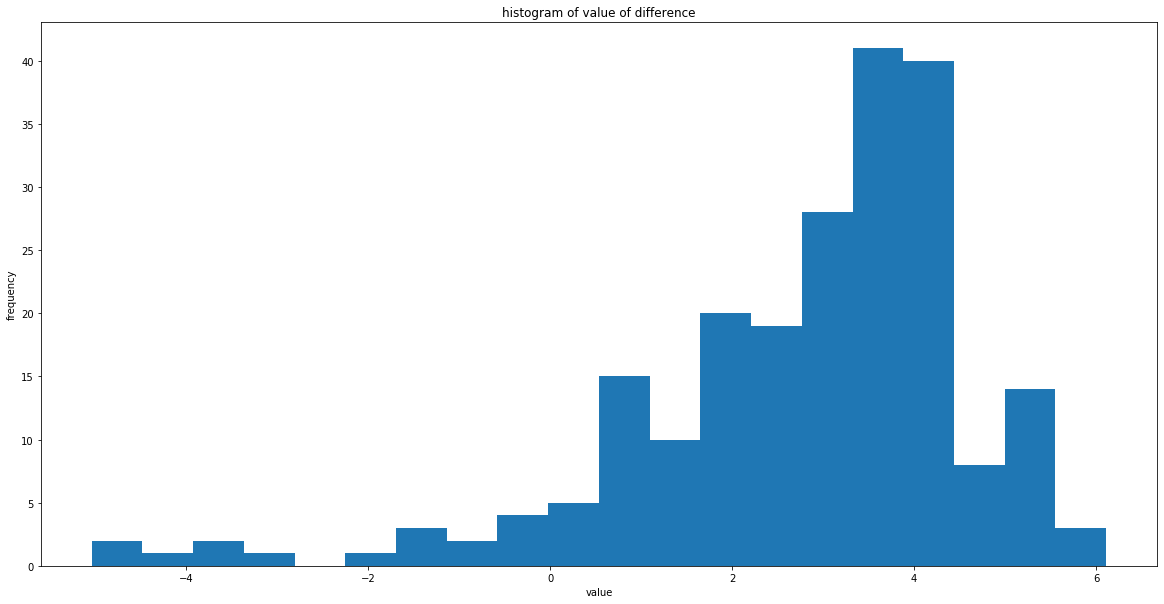

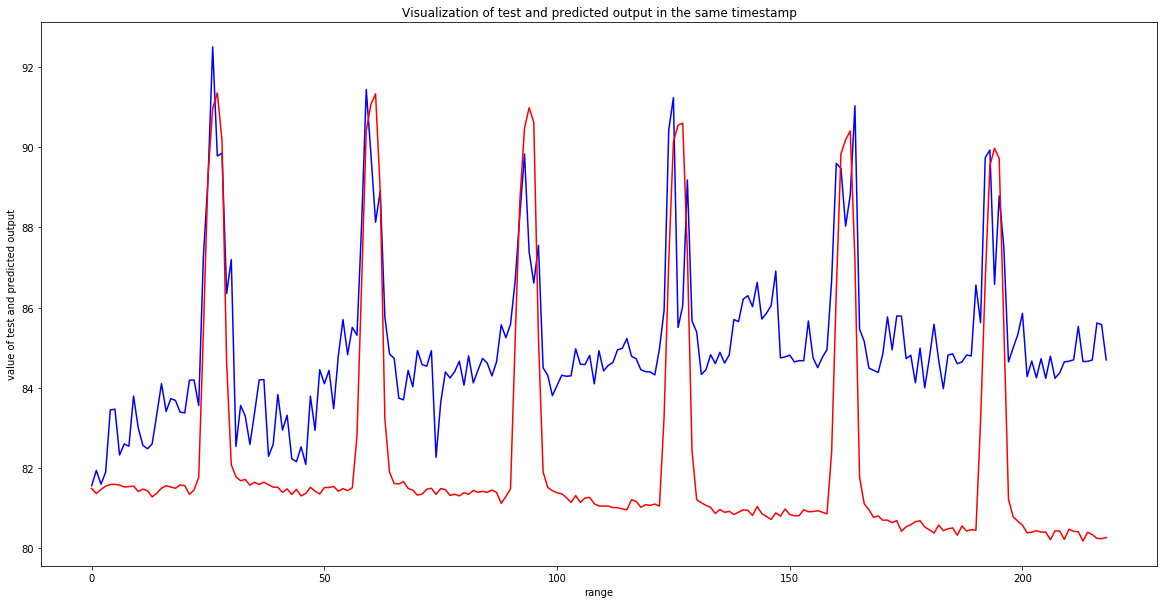

r_2 statistic: -0.38
Mean_absolute_error: 3.09
Mean squared error: 11.38
RMSE:  3.373062260276891
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

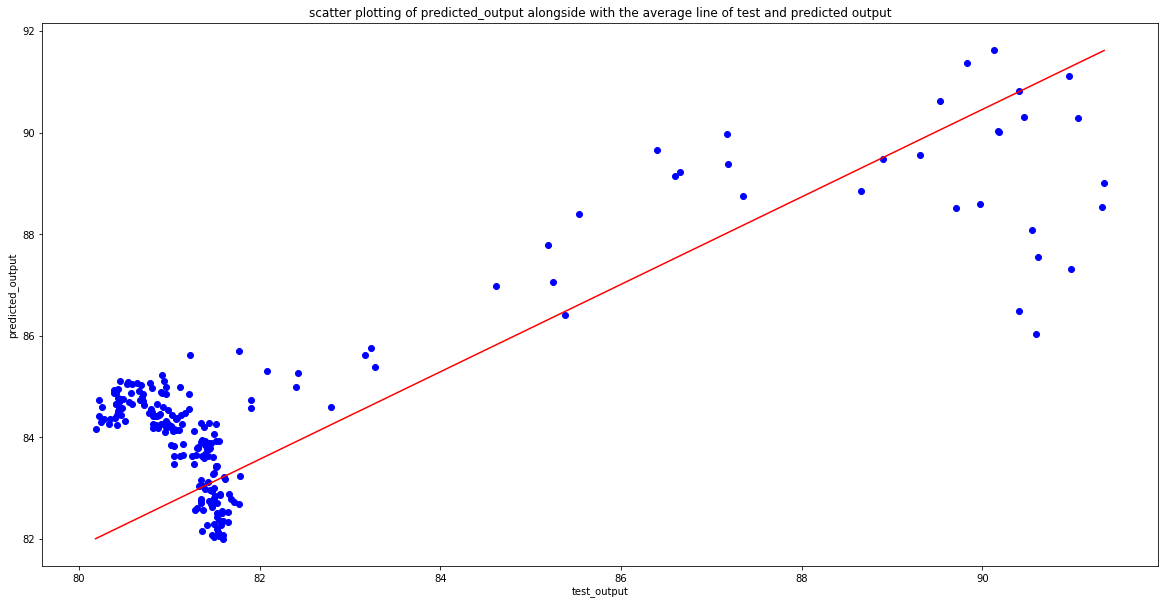

<class 'numpy.ndarray'>


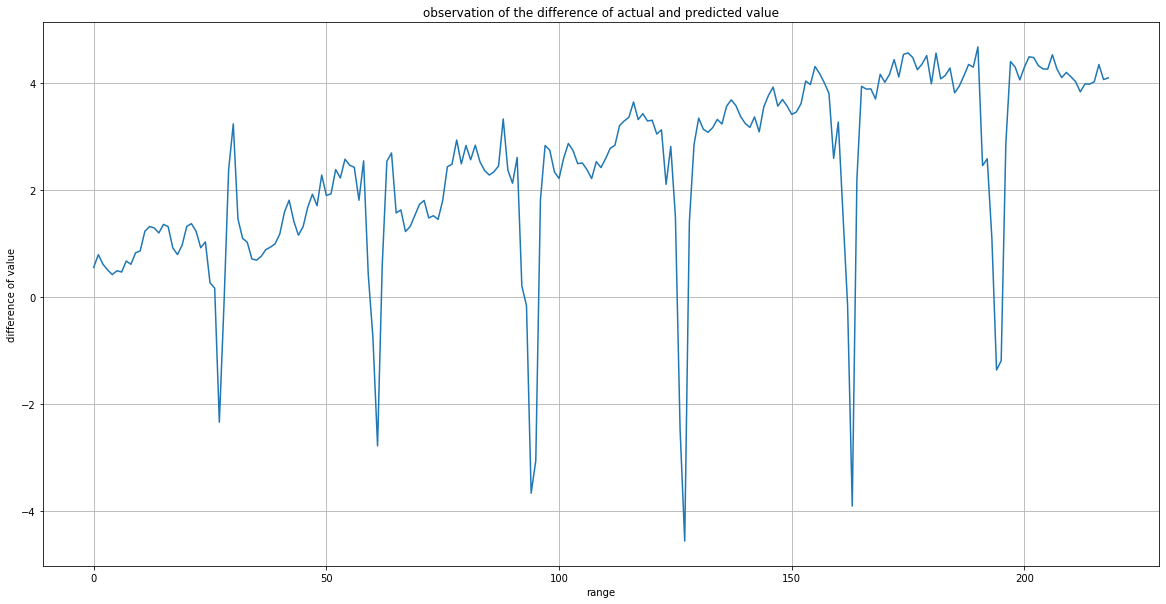

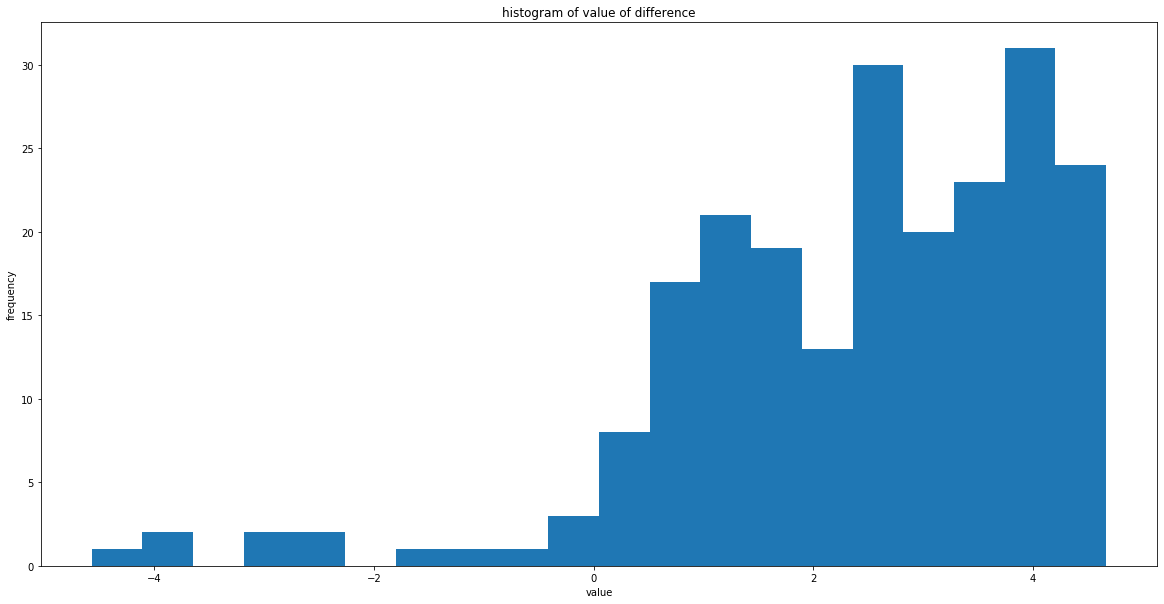

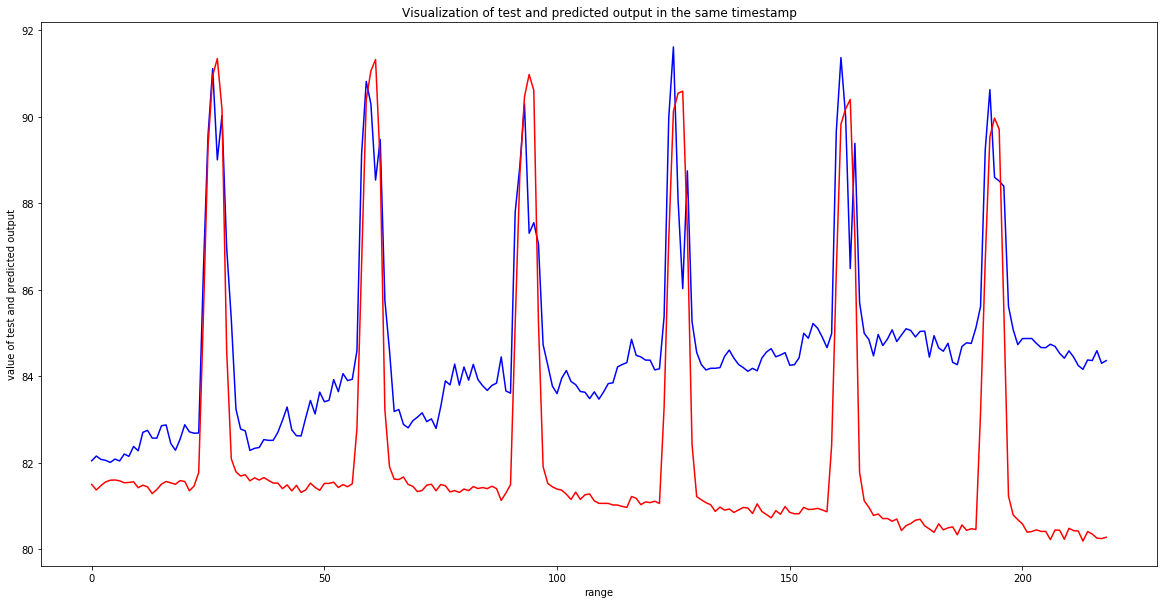

r_2 statistic: -0.03
Mean_absolute_error: 2.62
Mean squared error: 8.46
RMSE:  2.908717391148572
!!!!---------------!!!!----------------!!!!
------- GBR


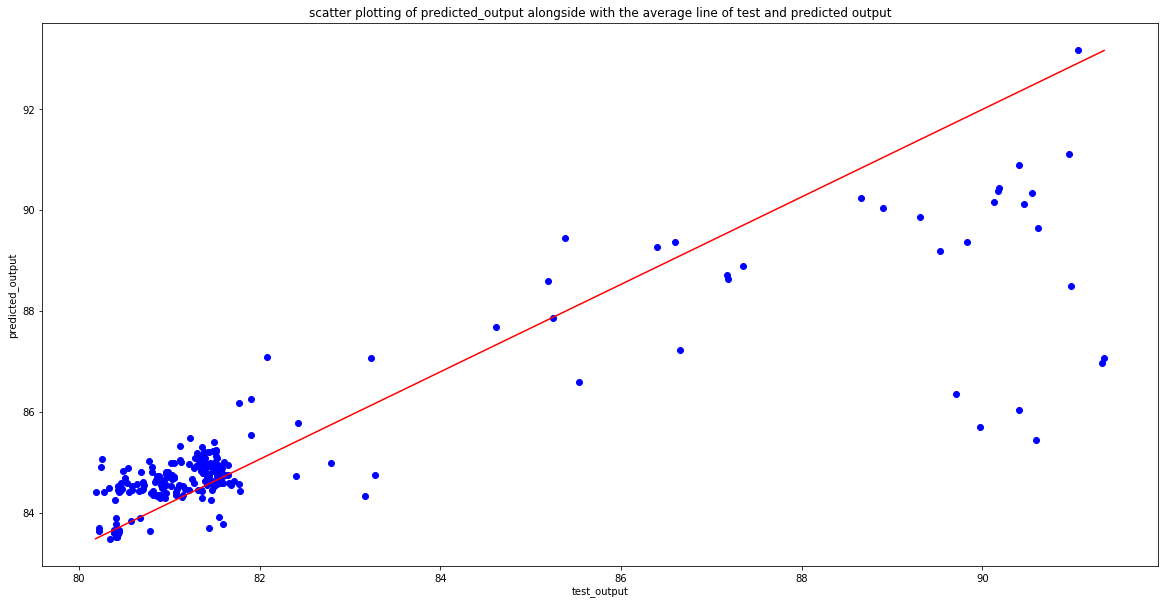

<class 'numpy.ndarray'>


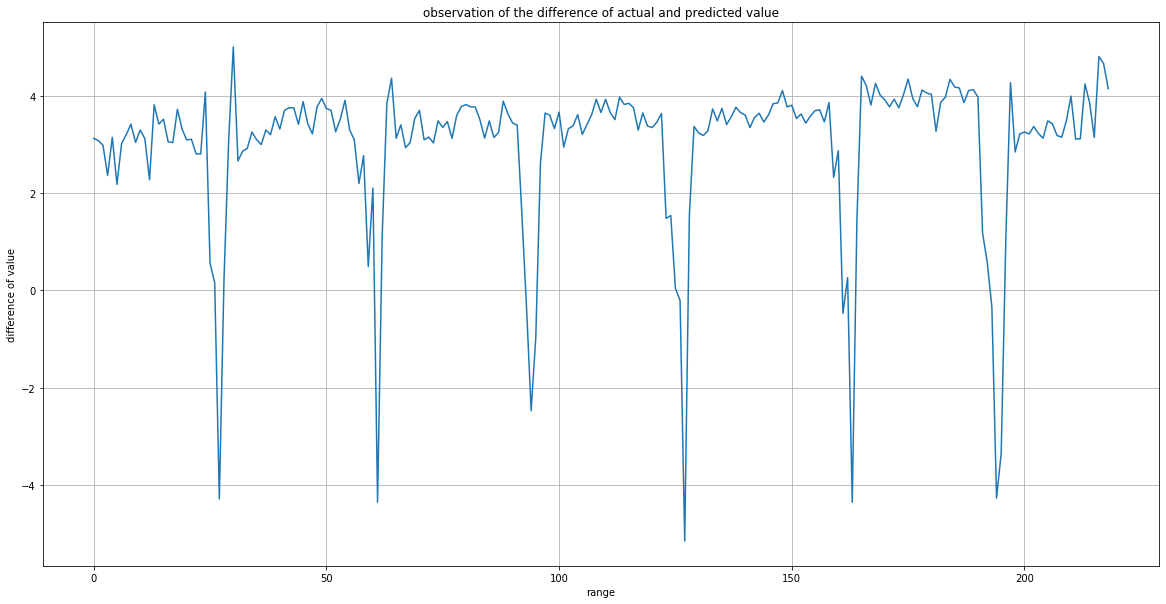

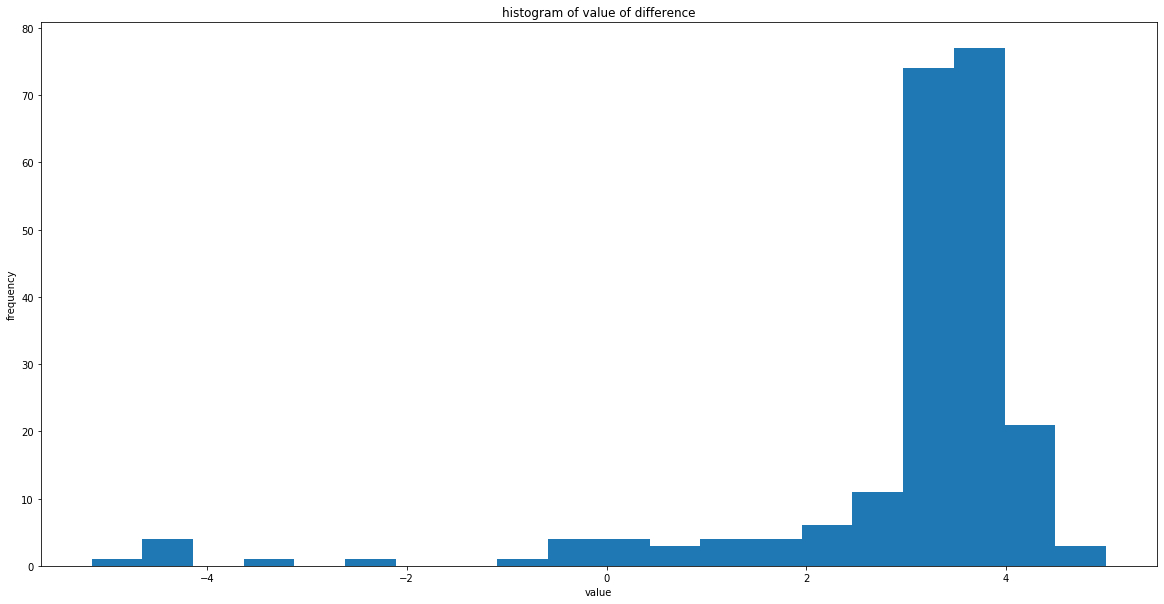

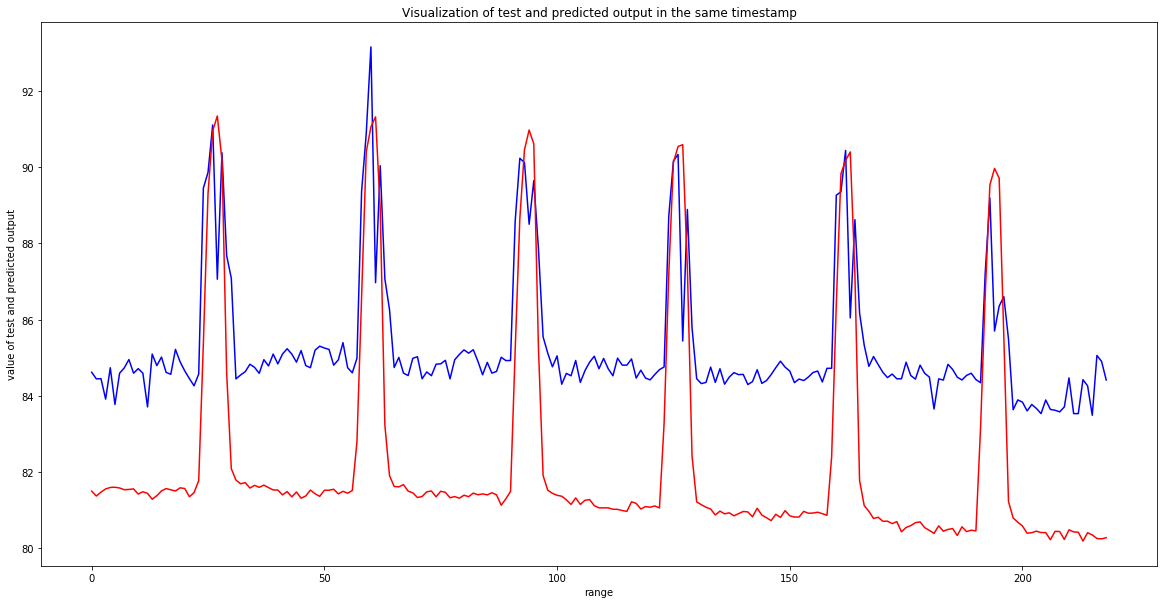

r_2 statistic: -0.41
Mean_absolute_error: 3.27
Mean squared error: 11.56
RMSE:  3.39971037641588
!!!!---------------!!!!----------------!!!!


In [55]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

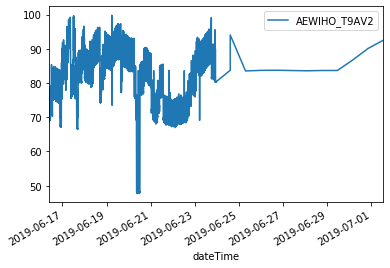

In [44]:
dataframe_datetime.iloc[0:].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)